### Homework:

#### Question:

##### • Consider the wine.csv data set, attached on OneDrive, with 13 attributes (columns 2–14). The first column "wine" is a target variable, so this data set could also be used for classification. Ignore this column when using unsupervised learning algorithms.

##### • Create clusters using K-means clustering, agglomerative clustering, and DBSCAN. Investigate the values of hyperparameters for each of these algorithms and the quality of clustering solutions. Choose the best clustering solution.

##### • Plot the best clustering solution in 2 dimensions using pairs of attributes as well as PCA.

##### • Compare the best clustering solution labels with the original data labels in the column "wine"

#### Code:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import cophenet, linkage, dendrogram
from scipy.spatial.distance import pdist

from sklearn.decomposition import PCA

from sklearn.datasets import load_wine
from sklearn.model_selection import GridSearchCV

In [3]:
# 1. Datset Description
wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['wine'] = wine.target

print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine 

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  wine  
0                            3.92   1065.0     0  
1                            3.40   1050.0     0  
2                            3.17   1185.0     0  
3                            3.45   1480.0     0  
4                            2.93    735.0     0  
..                            ...      ...   ...  
173                          1.74    740.0     2  
174                          1.56    750.0     2  
175                          1.56    835.0     2  
176                          1.62    840.0     2  
177                          1.60    560.0     2  

[178 rows x 14 columns]

In [4]:
scaler = MinMaxScaler()

# dropping the wine column, as it makes classification
X = scaler.fit_transform(df.drop(columns=['wine']))

In [41]:
def plot_both(x_axis, inertias, silhouette_scores, bar=False, label=None):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    if label: fig.suptitle(f'Varying {label}')
    
    if not bar: axs[0].plot(x_axis, inertias, marker='o')
    else: axs[0].bar(x_axis, inertias)
    axs[0].set_xlabel(label)
    axs[0].set_ylabel('Inertia')
    axs[0].set_title('Inertias')

    if not bar: axs[1].plot(x_axis, silhouette_scores, marker='o')
    else: axs[1].bar(x_axis, silhouette_scores)
    axs[1].set_xlabel(label)
    axs[1].set_ylabel('Silhouette Scores')
    axs[1].set_title('Silhouette Scores')

    plt.show()

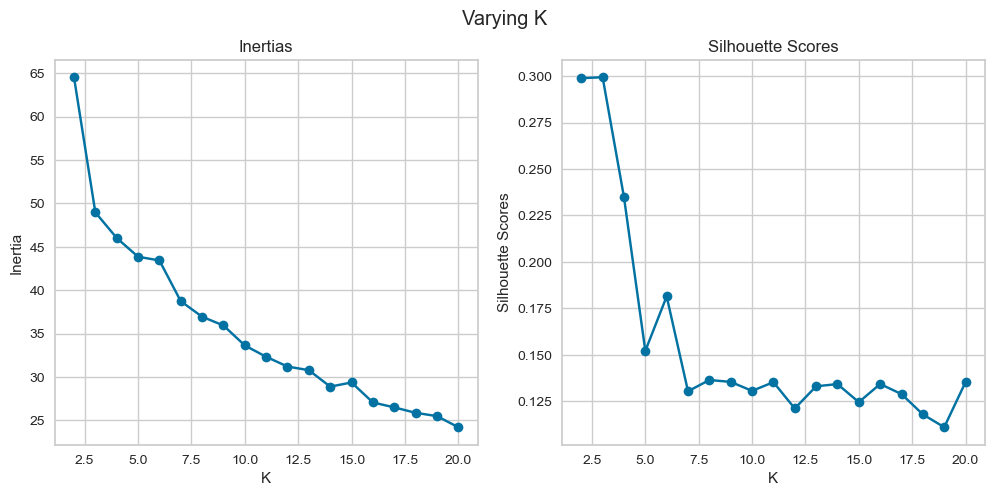

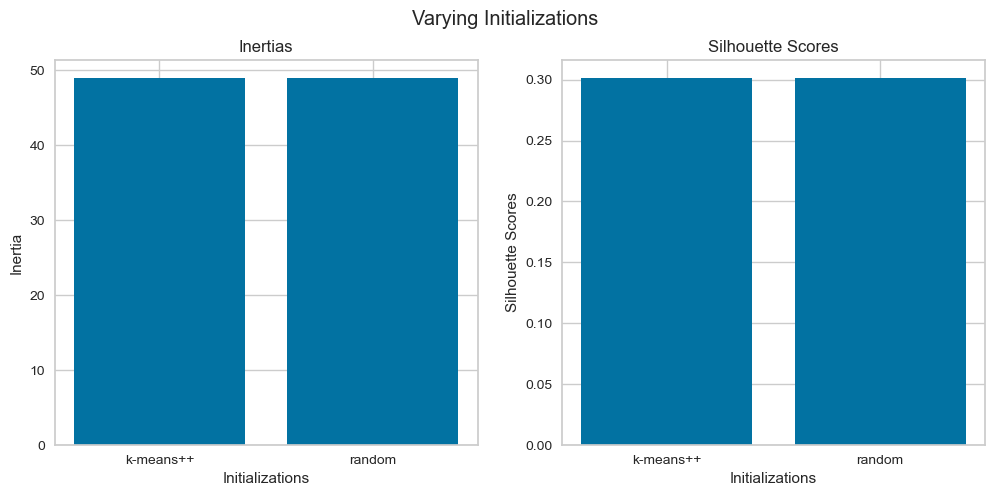

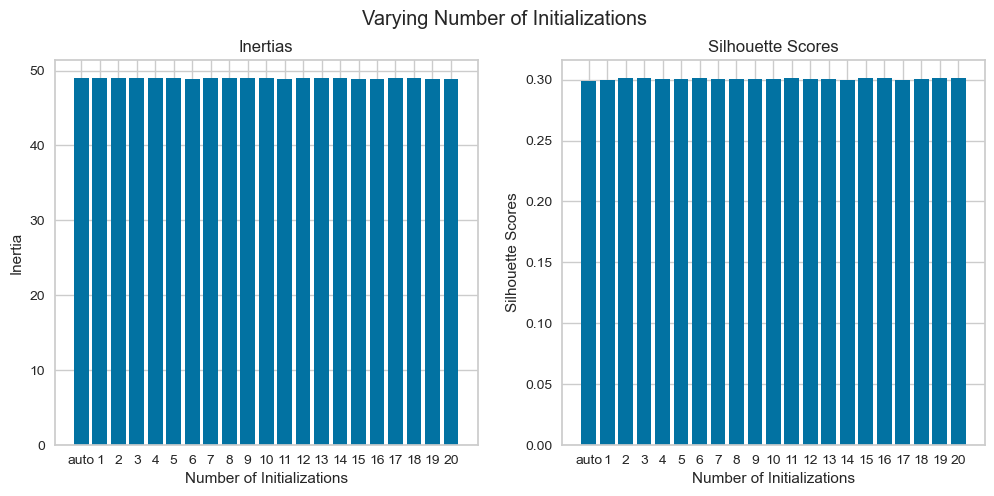

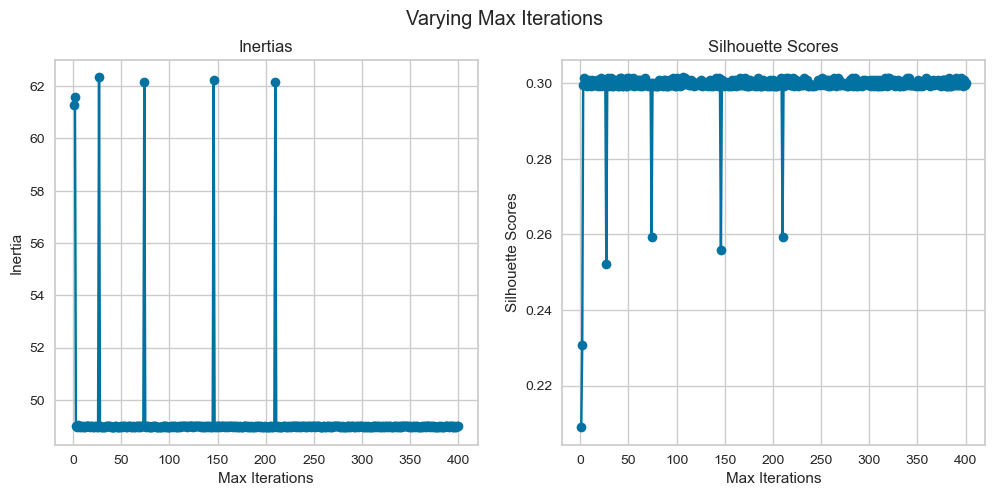

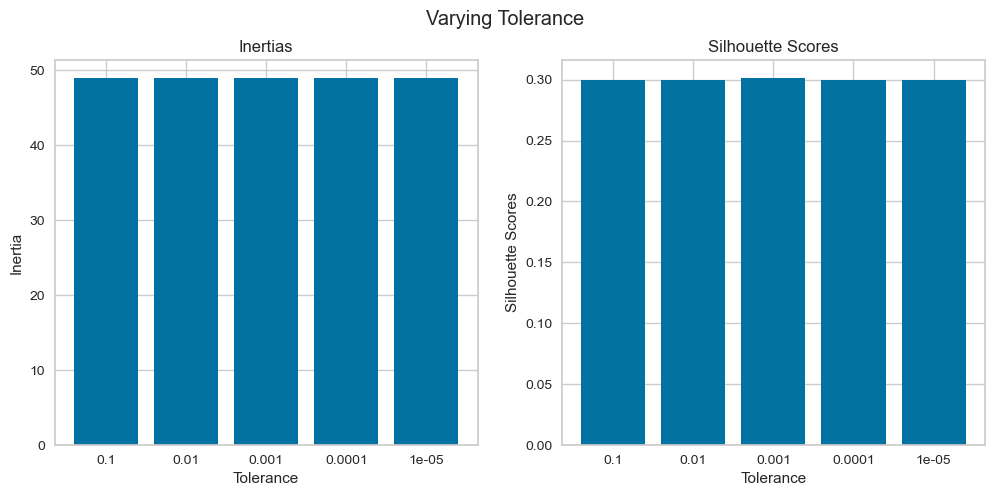

In [6]:
# 2ai. K-Means Clustering, Investigate Hyperparamters
silhouette_scores, inertias = [], []
x_axis = range(2, 21)
for i in x_axis:
    km = KMeans(i).fit(X)
    silhouette_scores.append(silhouette_score(X, km.labels_))
    inertias.append(km.inertia_)
plot_both(x_axis, inertias, silhouette_scores, label='K')

silhouette_scores, inertias = [], []
x_axis = ['k-means++', 'random']
for i in x_axis:
    km = KMeans(3, init=i).fit(X)
    silhouette_scores.append(silhouette_score(X, km.labels_))
    inertias.append(km.inertia_)
plot_both(x_axis, inertias, silhouette_scores, bar=True, label='Initializations')

silhouette_scores, inertias = [], []
x_axis = ['auto'] + [i for i in range(1, 21)]
for i in x_axis:
    km = KMeans(3, n_init=i).fit(X)
    silhouette_scores.append(silhouette_score(X, km.labels_))
    inertias.append(km.inertia_)
plot_both([str(i) for i in x_axis], inertias, silhouette_scores, bar=True, label='Number of Initializations')

silhouette_scores, inertias = [], []
x_axis = range(1, 401)
for i in x_axis:
    km = KMeans(3, max_iter=i).fit(X)
    silhouette_scores.append(silhouette_score(X, km.labels_))
    inertias.append(km.inertia_)
plot_both(x_axis, inertias, silhouette_scores, label='Max Iterations')

silhouette_scores, inertias = [], []
x_axis = [1*10**-i for i in range(1, 6)]
for i in x_axis:
    km = KMeans(3, tol=i).fit(X)
    silhouette_scores.append(silhouette_score(X, km.labels_))
    inertias.append(km.inertia_)
plot_both([str(i) for i in x_axis], inertias, silhouette_scores, bar=True, label='Tolerance')

Inertia: 48.97029115513917
Silhouette Score: 0.29936674064895064


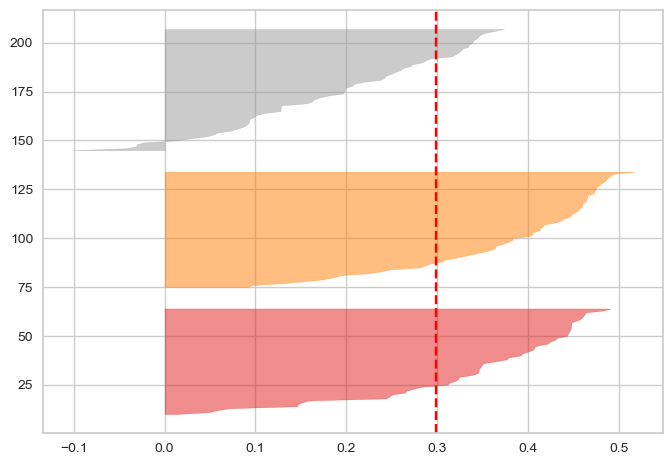

In [7]:
# Analyze Quality
km = KMeans(3).fit(X)
visualizer = SilhouetteVisualizer(km).fit(X)
km_score = visualizer.silhouette_score_
print(f'Inertia: {km.inertia_}\nSilhouette Score: {km_score}')

In [43]:
def plot_silhouette_scores(x_axis, silhouette_scores, bar=False, label=None):
    if label: plt.title(f'Varying {label}')

    if not bar: plt.plot(x_axis, silhouette_scores, marker='o')
    else: plt.bar(x_axis, silhouette_scores)
    plt.xlabel(label)
    plt.ylabel('Silhouette Scores')

    plt.show()

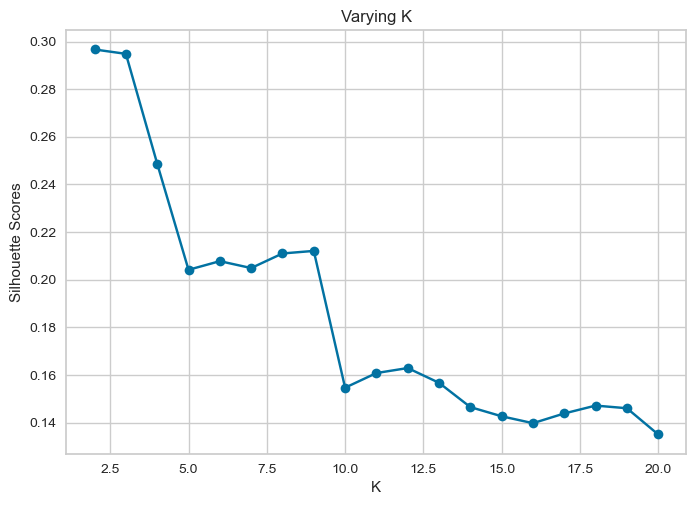

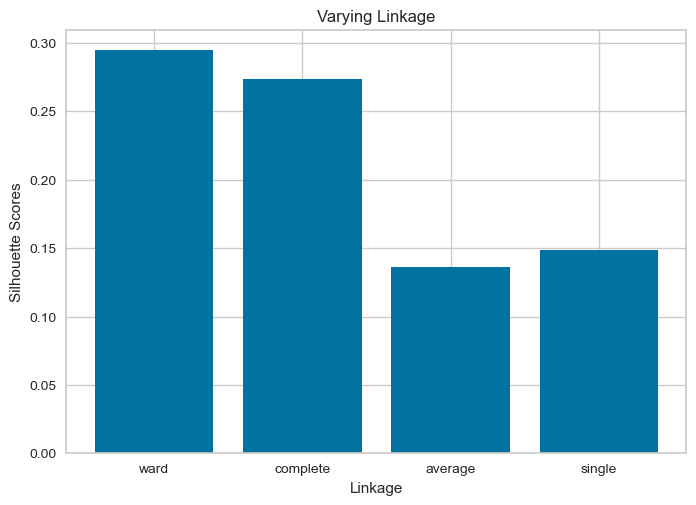

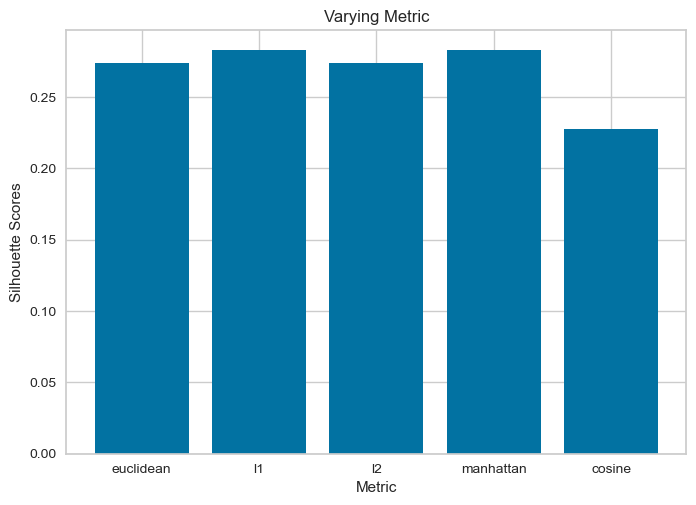

In [9]:
# 2aii. Agglomerative Clustering, Investigate Hyperparameters
silhouette_scores = []
x_axis = range(2, 21)
for i in x_axis:
    ac = AgglomerativeClustering(i).fit(X)
    silhouette_scores.append(silhouette_score(X, ac.labels_))
plot_silhouette_scores(x_axis, silhouette_scores, label='K')

silhouette_scores = []
x_axis = ['ward', 'complete', 'average', 'single']
for i in x_axis:
    ac = AgglomerativeClustering(3, linkage=i).fit(X)
    silhouette_scores.append(silhouette_score(X, ac.labels_))
plot_silhouette_scores(x_axis, silhouette_scores, bar=True, label='Linkage')

silhouette_scores = []
x_axis = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
for i in x_axis:
    ac = AgglomerativeClustering(3, linkage='complete', metric=i).fit(X)
    silhouette_scores.append(silhouette_score(X, ac.labels_))
plot_silhouette_scores(x_axis, silhouette_scores, bar=True, label='Metric')

Silhouette Score: 0.2948290632158541
Cophnetic Coefficient: 0.703398741402486


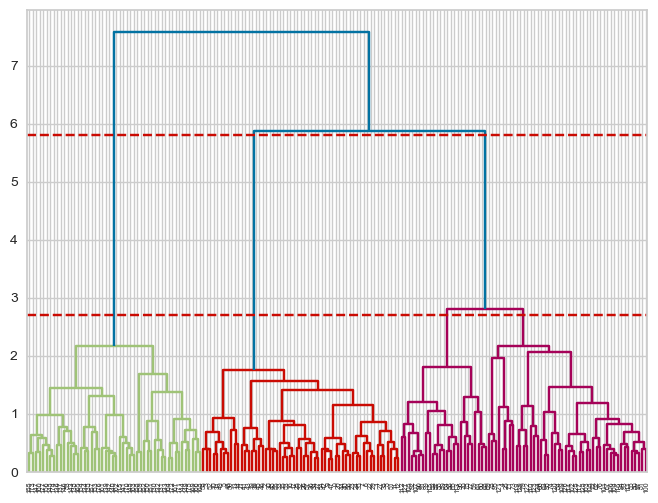

In [10]:
# Analyze Quality
ac = AgglomerativeClustering(3).fit(X)
ac_score = silhouette_score(X, ac.labels_)
cophnetic_coefficient, _ = cophenet(linkage(X, metric='euclidean', method='ward'), pdist(X))
print(f'Silhouette Score: {ac_score}\nCophnetic Coefficient: {cophnetic_coefficient}')

plt.figure(figsize=(8, 6))
dendrogram(linkage(X, method='ward'))
plt.axhline(y=5.8, color='r', linestyle='--')
plt.axhline(y=2.7, color='r', linestyle='--')
plt.show()

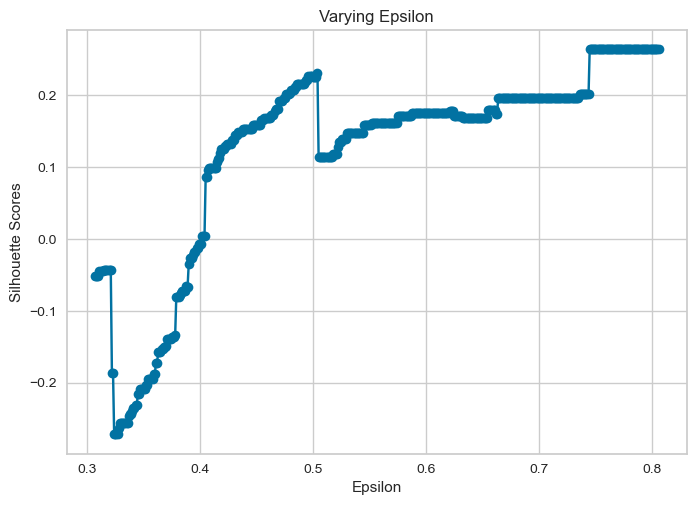

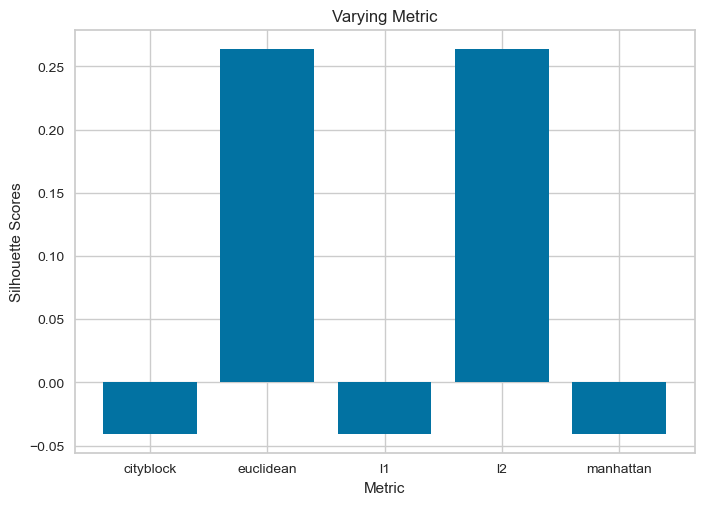

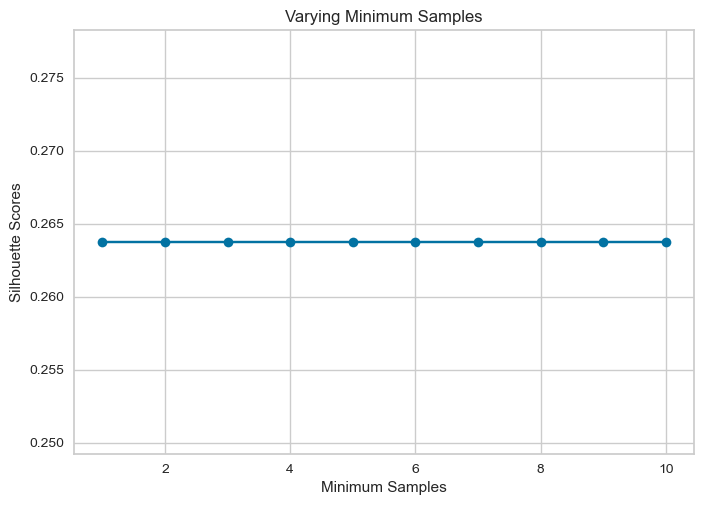

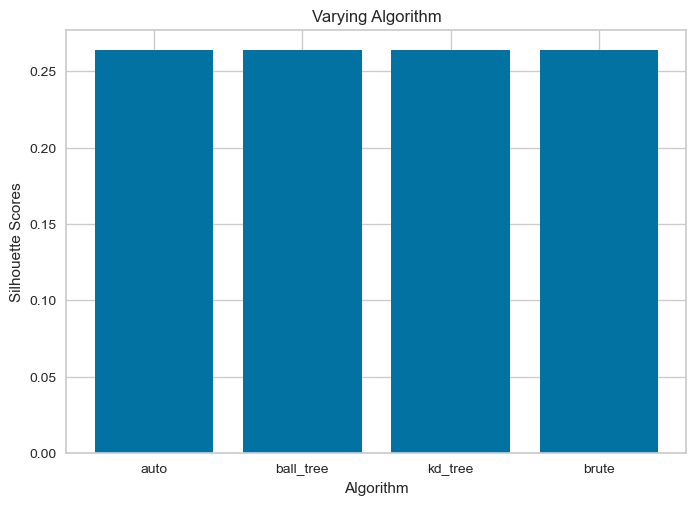

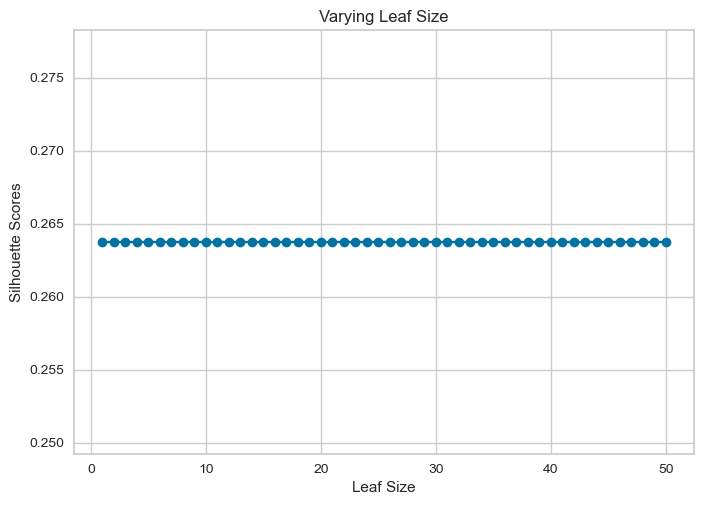

In [11]:
# 2aiii. DBSCAN, Investigate Hyperparameters
silhouette_scores, remove_list = [], []
x_axis = [i*10**-3 for i in range(1, 1001)]
for i in x_axis:
    dbscan = DBSCAN(i).fit(X)
    if len(np.unique(dbscan.labels_)) == 1: remove_list.append(i)
    else: silhouette_scores.append(silhouette_score(X, dbscan.labels_))
plot_silhouette_scores([i for i in x_axis if i not in remove_list], silhouette_scores, label='Epsilon')

silhouette_scores, remove_list = [], []
x_axis = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']
for i in x_axis:
    dbscan = DBSCAN(0.8, metric=i).fit(X)
    if len(np.unique(dbscan.labels_)) == 1: remove_list.append(i)
    else: silhouette_scores.append(silhouette_score(X, dbscan.labels_))
plot_silhouette_scores([i for i in x_axis if i not in remove_list], silhouette_scores, bar=True, label='Metric')

silhouette_scores, remove_list = [], []
x_axis = range(1, 11)
for i in x_axis:
    dbscan = DBSCAN(0.8, min_samples=i).fit(X)
    if len(np.unique(dbscan.labels_)) == 1: remove_list.append(i)
    else: silhouette_scores.append(silhouette_score(X, dbscan.labels_))
plot_silhouette_scores([i for i in x_axis if i not in remove_list], silhouette_scores, label='Minimum Samples')

silhouette_scores, remove_list = [], []
x_axis = ['auto', 'ball_tree', 'kd_tree', 'brute']
for i in x_axis:
    dbscan = DBSCAN(0.8, algorithm=i).fit(X)
    if len(np.unique(dbscan.labels_)) == 1: remove_list.append(i)
    else: silhouette_scores.append(silhouette_score(X, dbscan.labels_))
plot_silhouette_scores([i for i in x_axis if i not in remove_list], silhouette_scores, bar=True, label='Algorithm')

silhouette_scores, remove_list = [], []
x_axis = range(1, 51)
for i in x_axis:
    dbscan = DBSCAN(0.8, leaf_size=i).fit(X)
    if len(np.unique(dbscan.labels_)) == 1: remove_list.append(i)
    else: silhouette_scores.append(silhouette_score(X, dbscan.labels_))
plot_silhouette_scores([i for i in x_axis if i not in remove_list], silhouette_scores, label='Leaf Size')

In [12]:
# Analyze Quality
dbscan = DBSCAN(0.8).fit(X)
labels, counts = np.unique(dbscan.labels_, return_counts=True)
dbscan_score = silhouette_score(X, dbscan.labels_)
print(f'Silhouette Score: {dbscan_score}')
print(f'{len(labels)} Clusters with {counts.tolist()} Datapoints in Each Cluster with {len(dbscan.core_sample_indices_)} Core Points')

Silhouette Score: 0.2637534868037775
2 Clusters with [1, 177] Datapoints in Each Cluster with 173 Core Points


In [13]:
# Select Best Clustering Solution
print(f'K-Means Clustering Silhouette Score: {km_score}')
print(f'Agglomerative Clustering Silhouette Score: {ac_score}')
print(f'DBSCAN Silhouette Score: {dbscan_score}')
solution = km  # k means is the best method

K-Means Clustering Silhouette Score: 0.29936674064895064
Agglomerative Clustering Silhouette Score: 0.2948290632158541
DBSCAN Silhouette Score: 0.2637534868037775


##### Here, we can observe that the silhouette score for K-Means Clustering is highest. So, it can be stated as the best model from the obtained values.

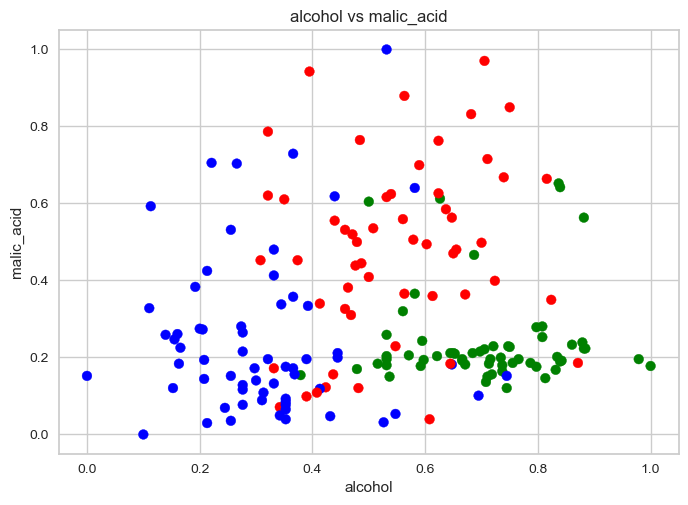

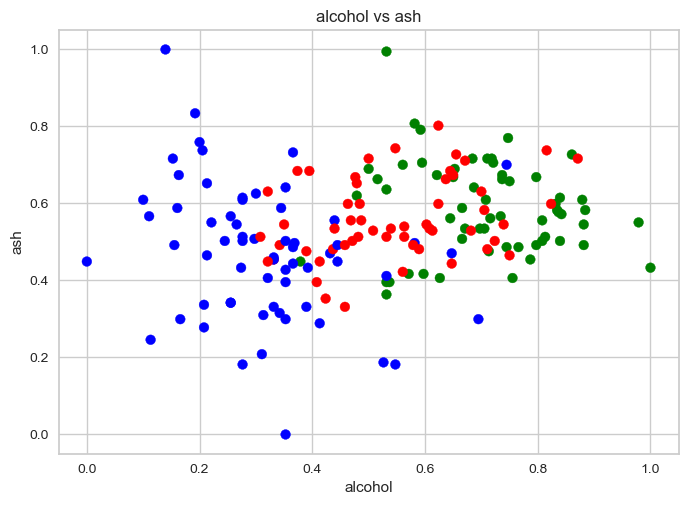

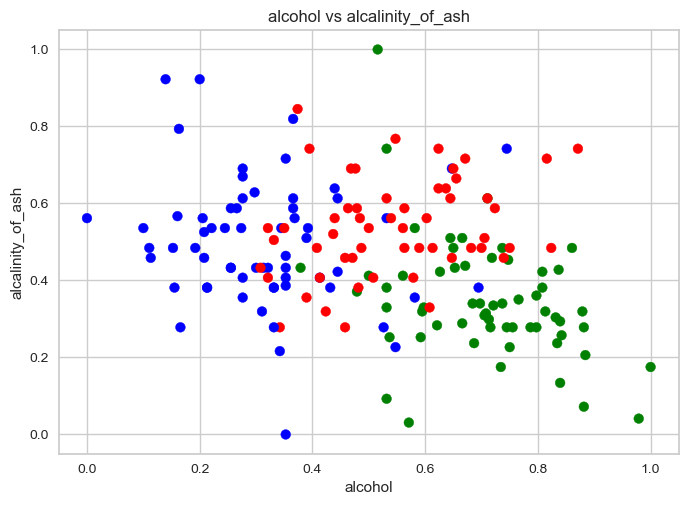

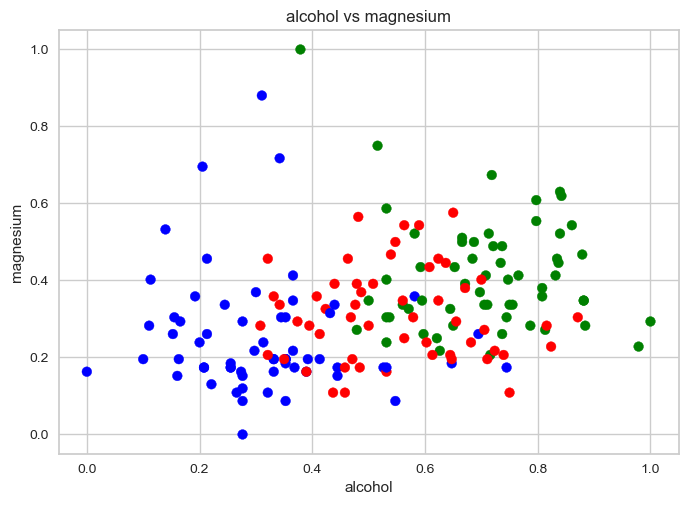

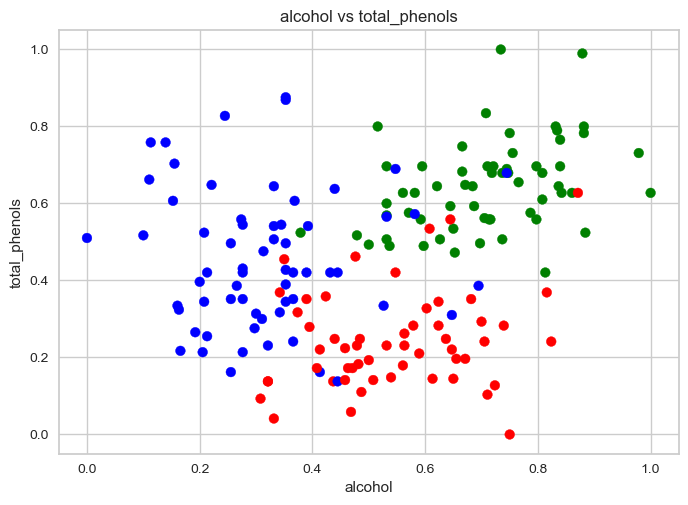

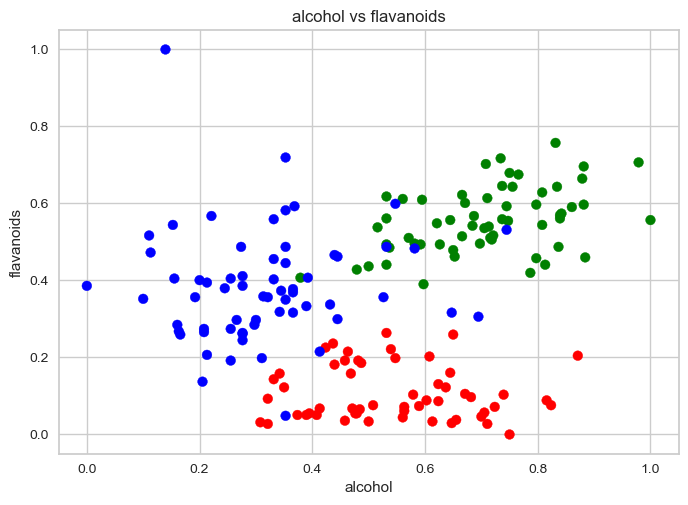

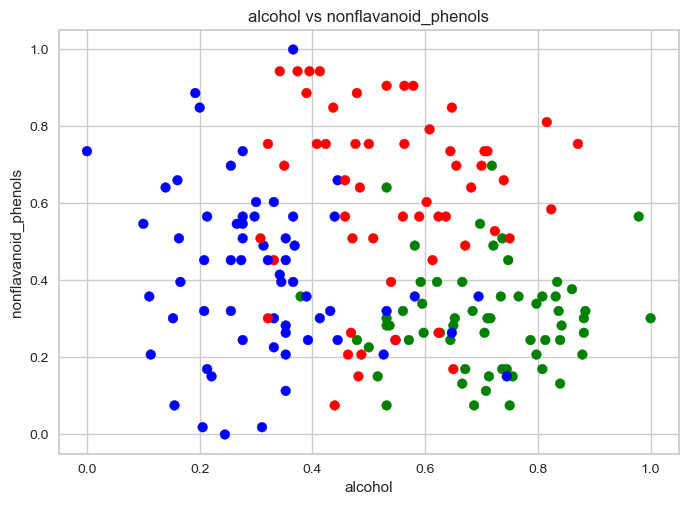

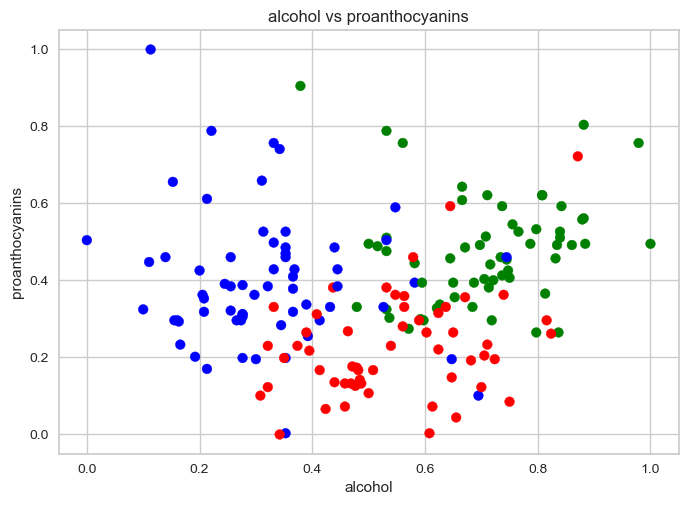

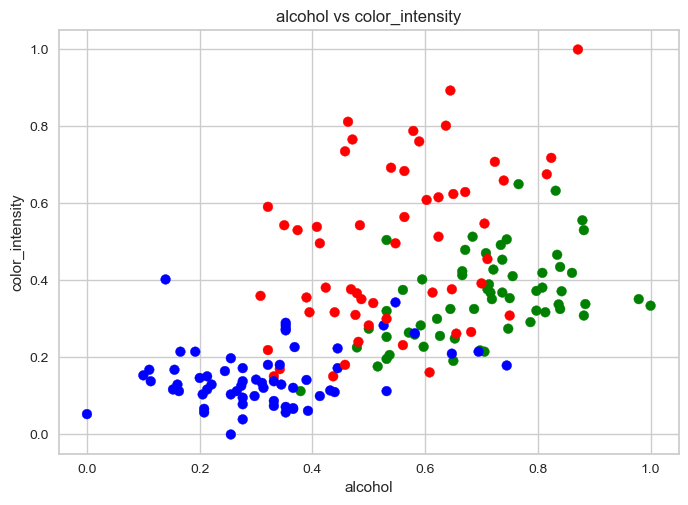

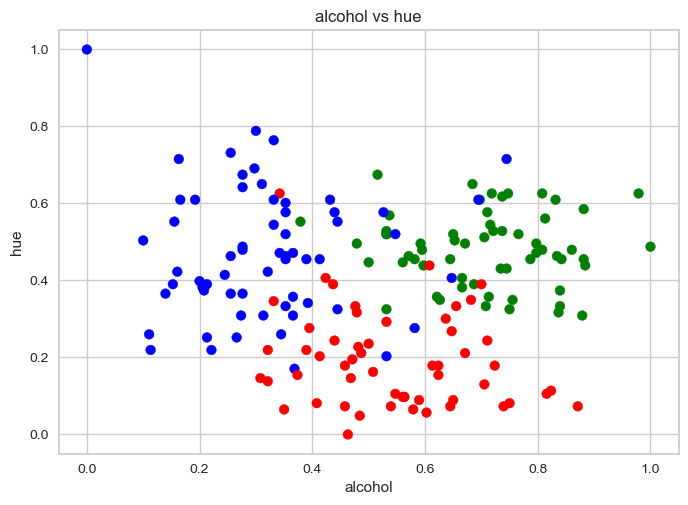

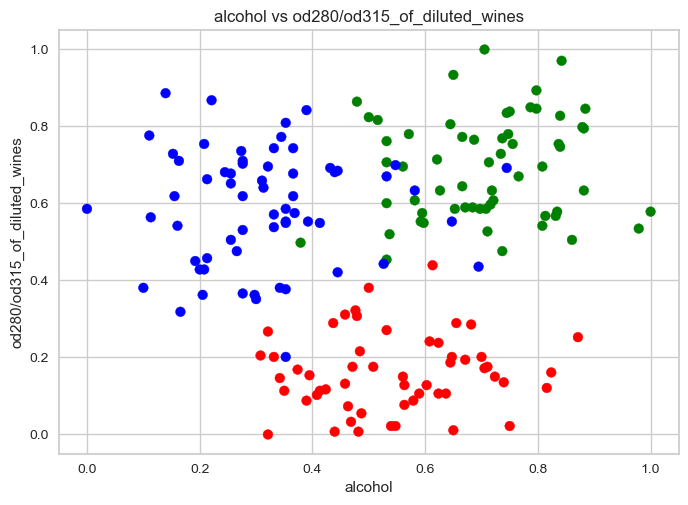

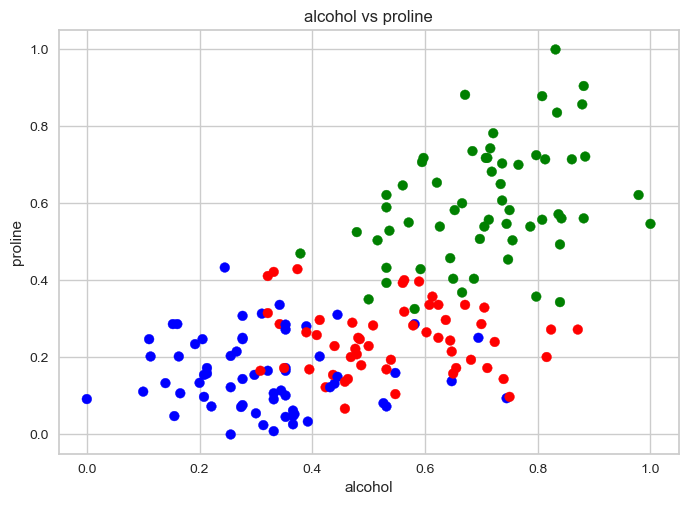

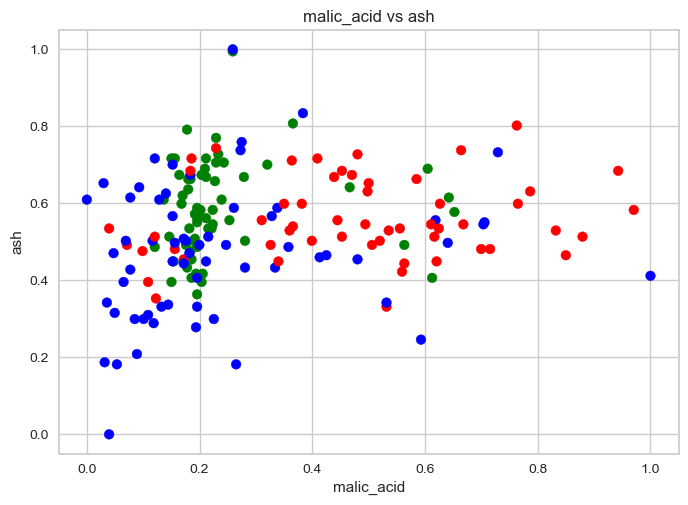

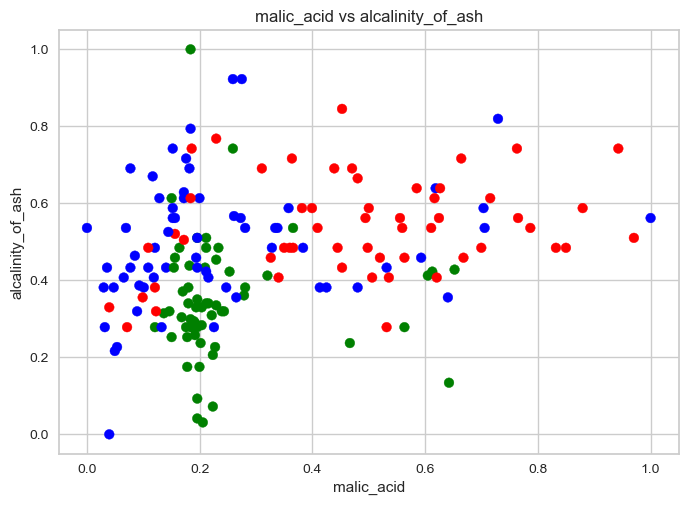

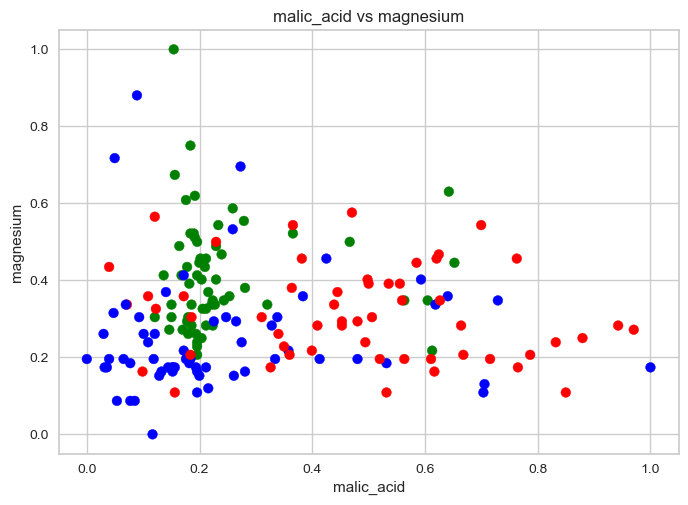

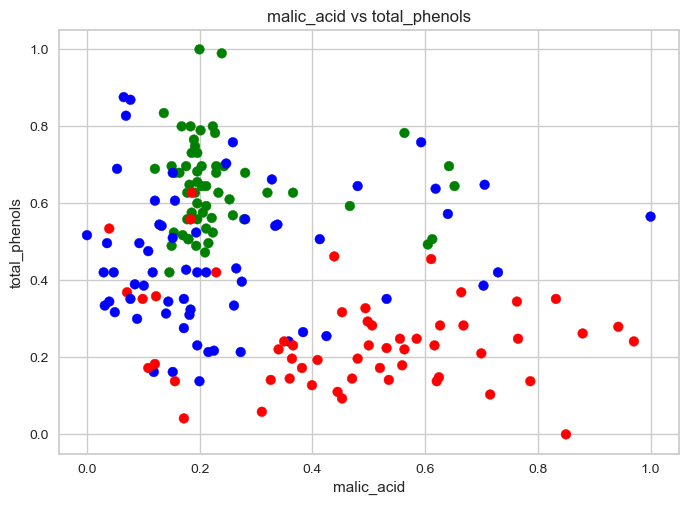

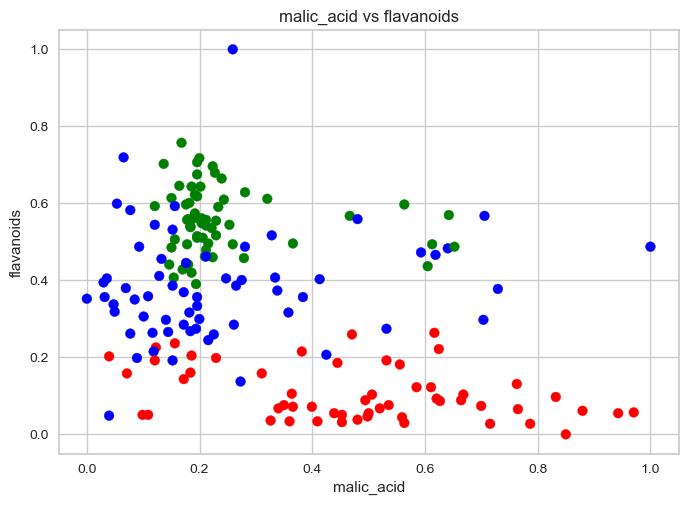

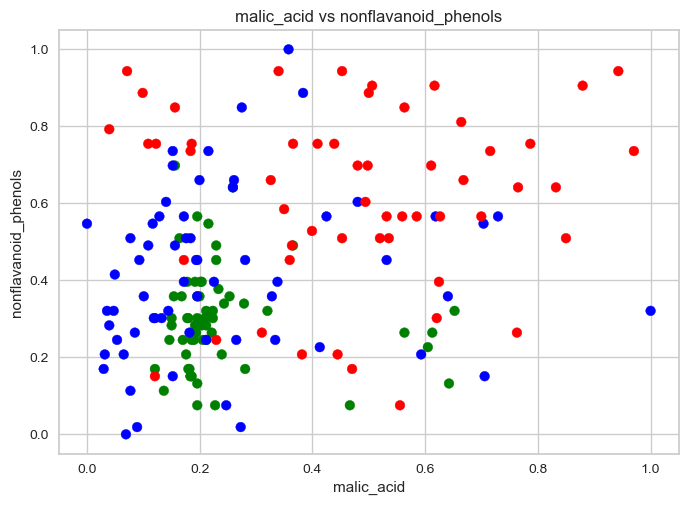

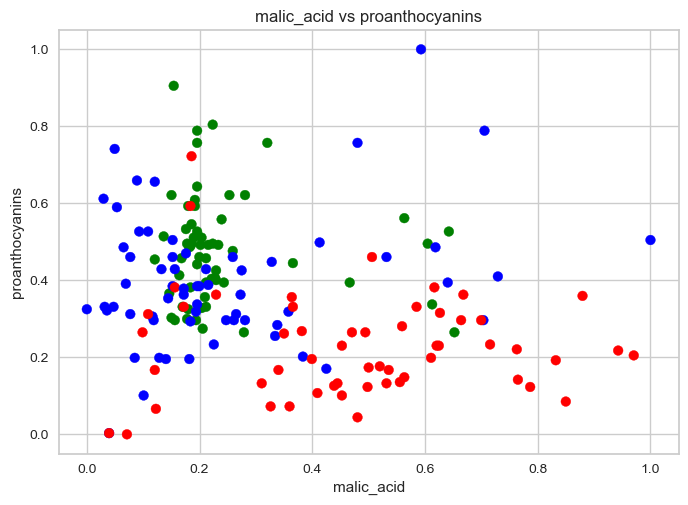

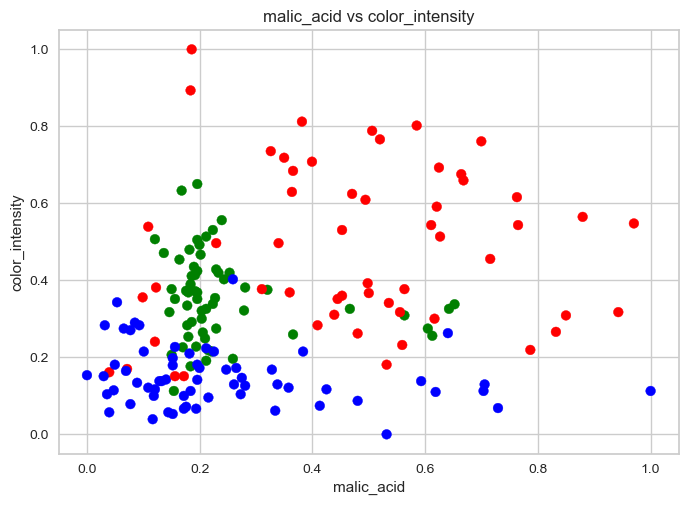

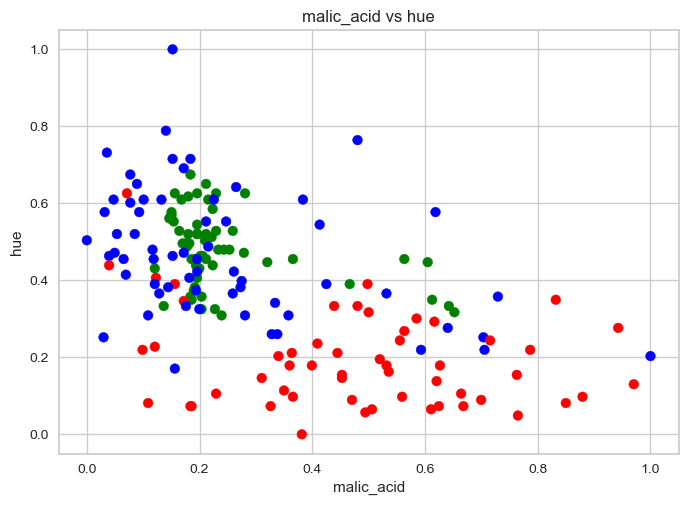

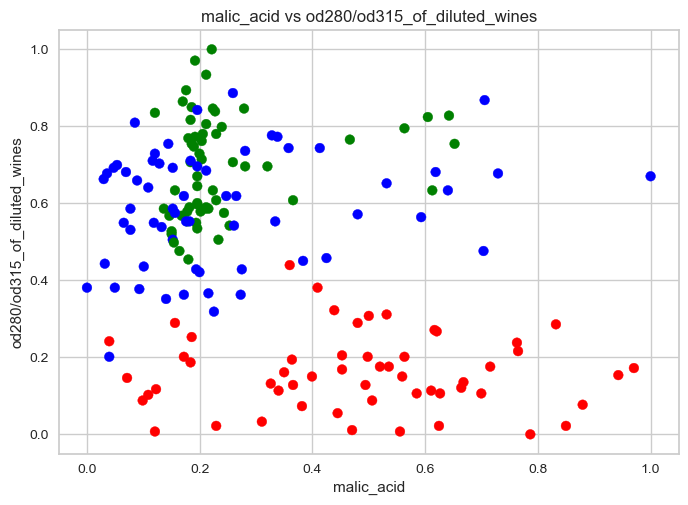

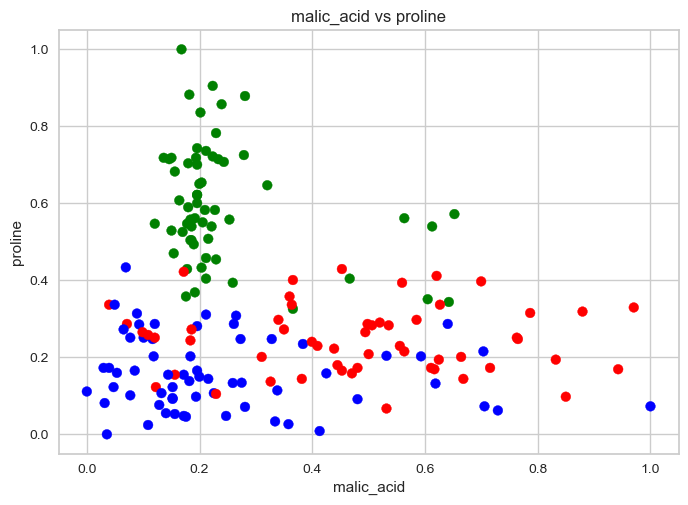

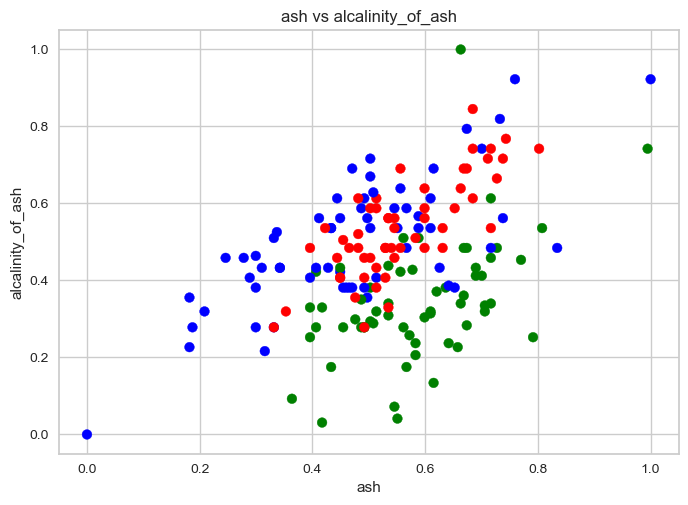

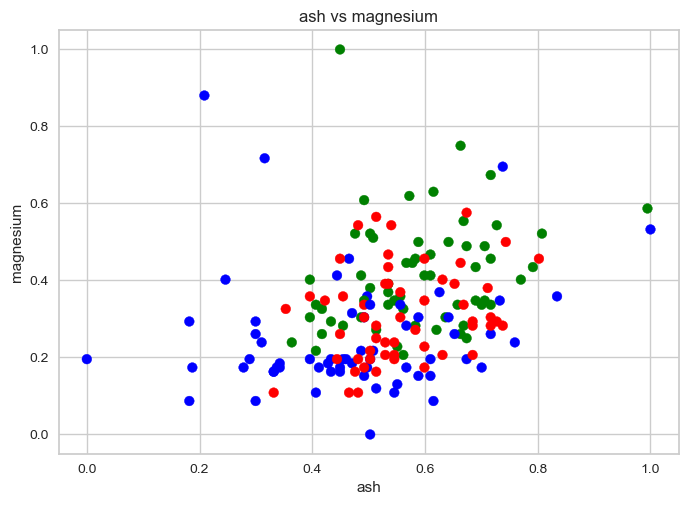

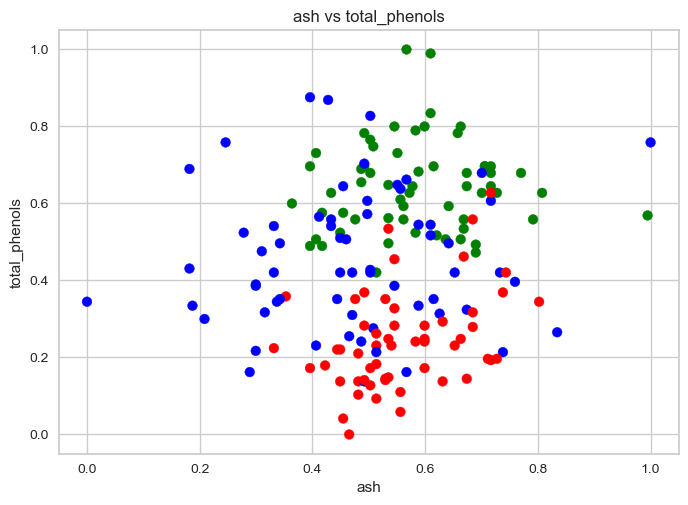

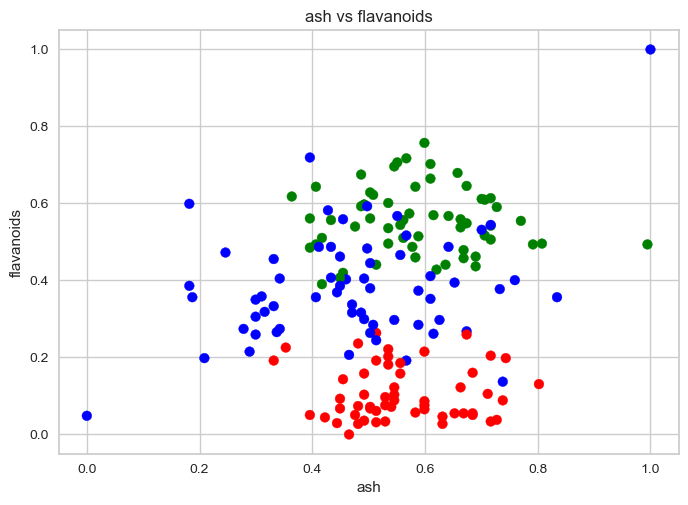

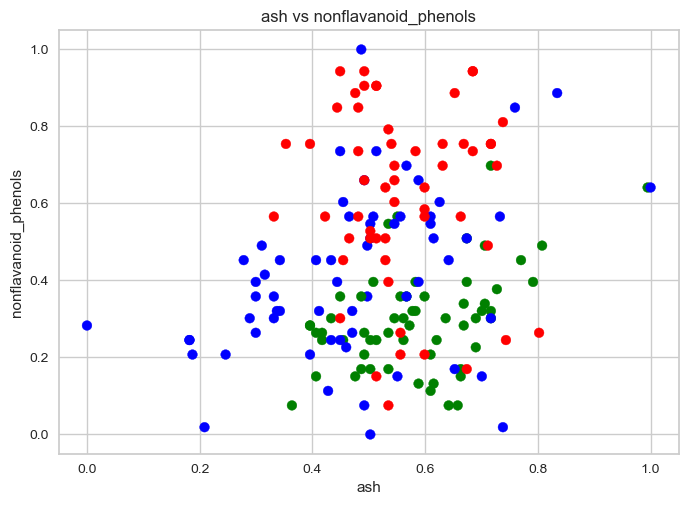

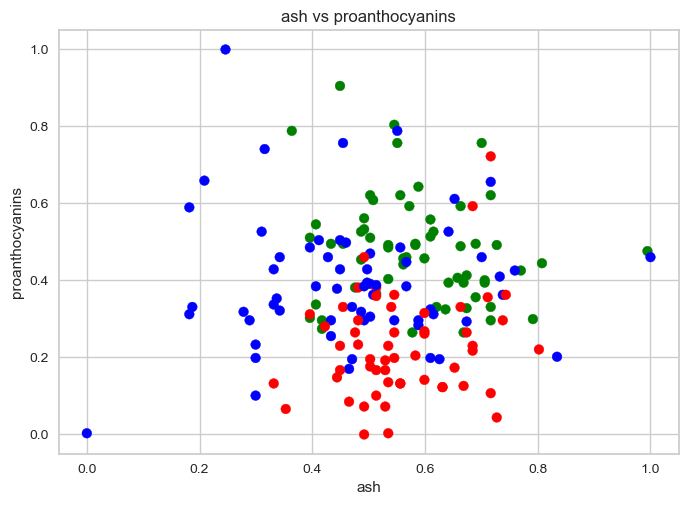

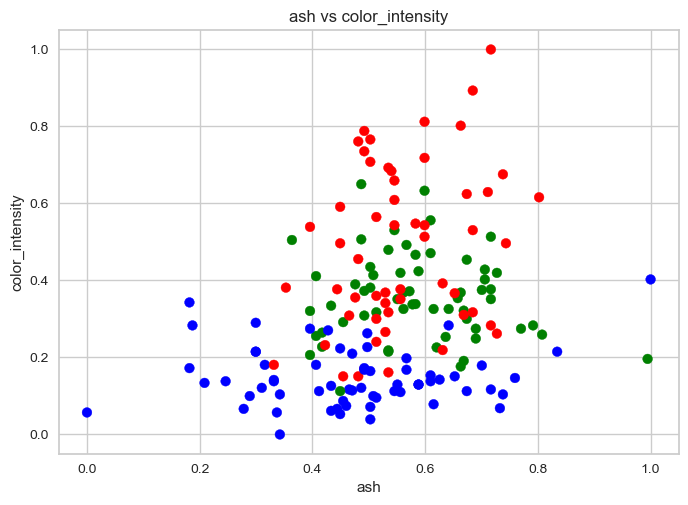

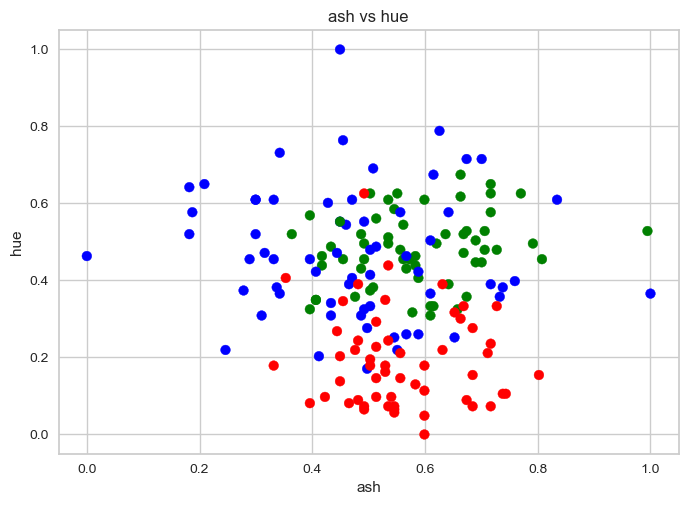

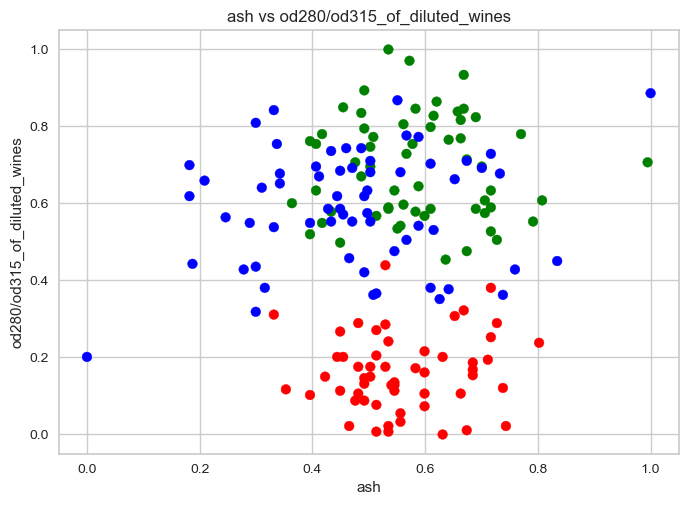

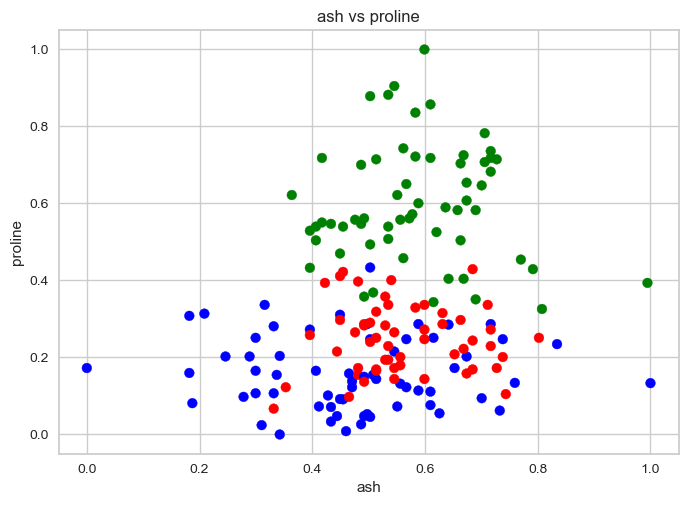

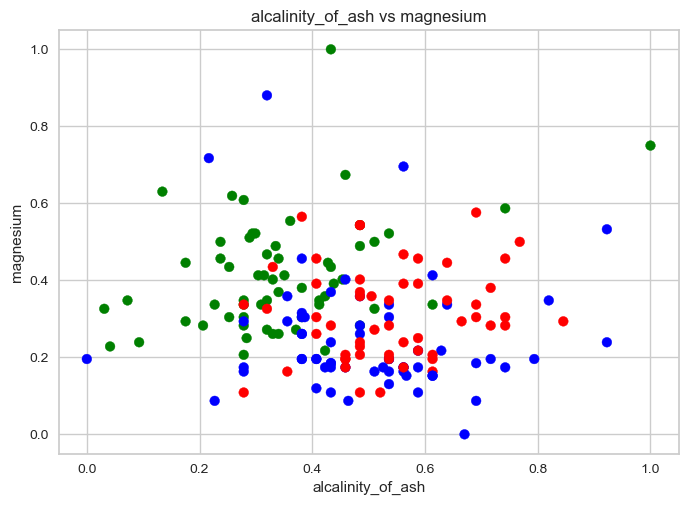

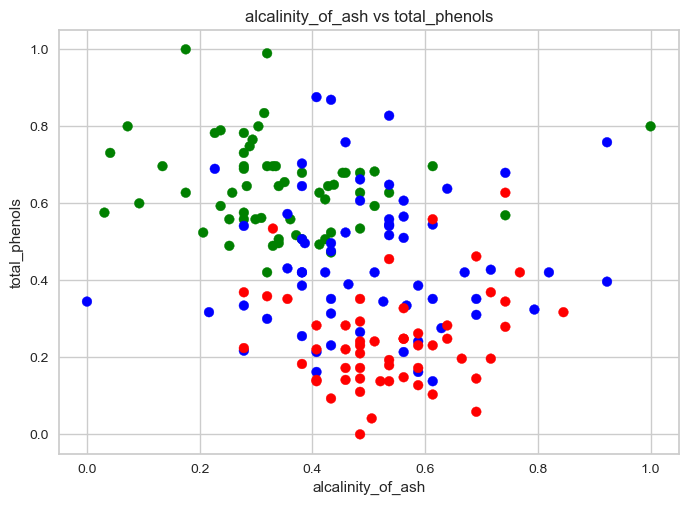

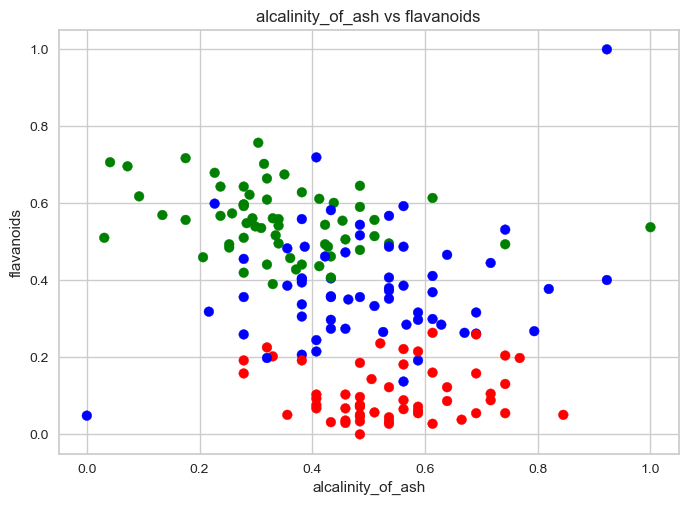

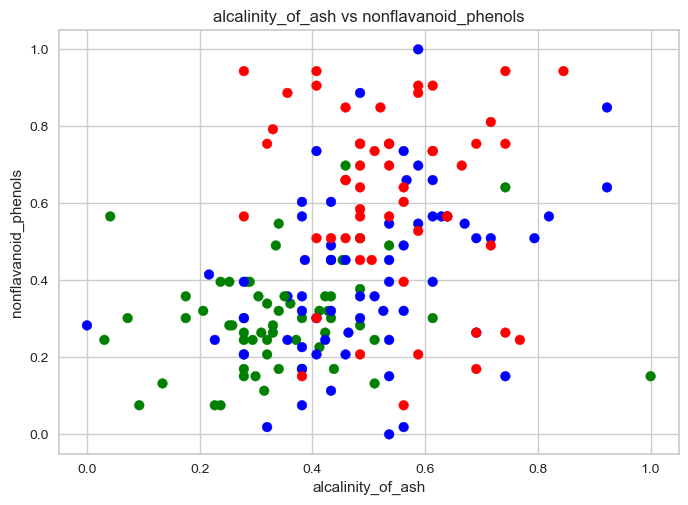

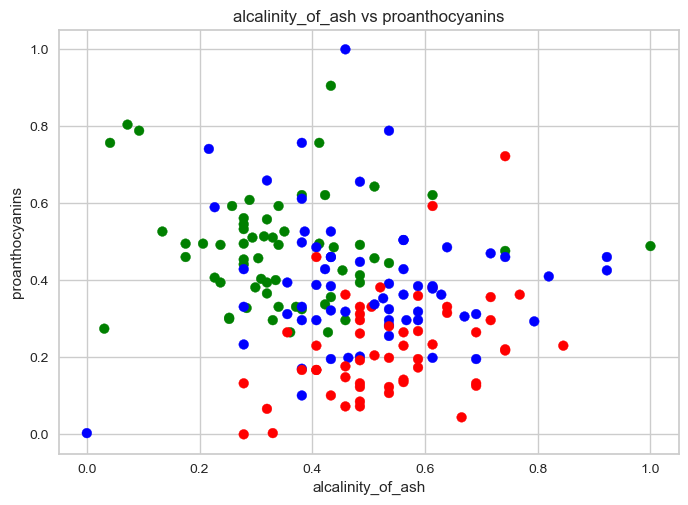

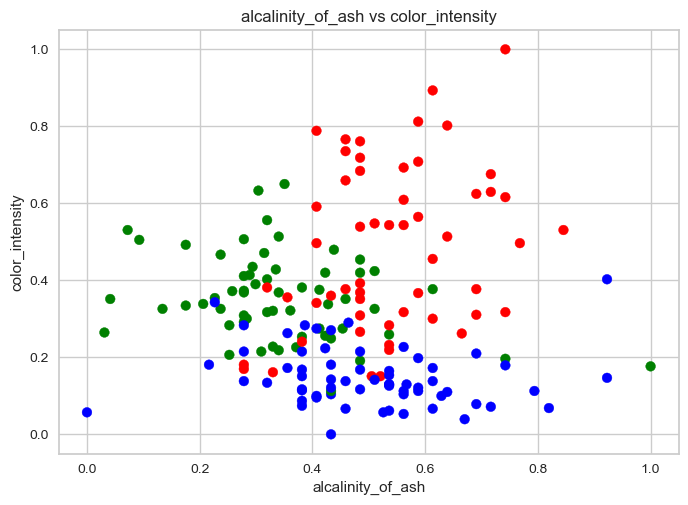

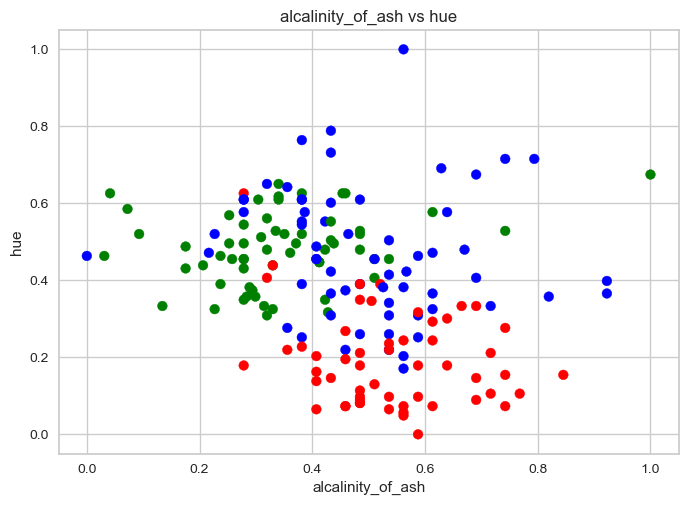

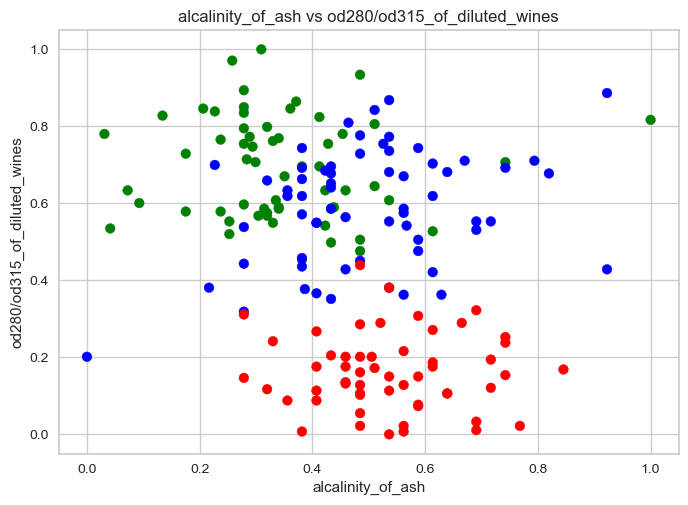

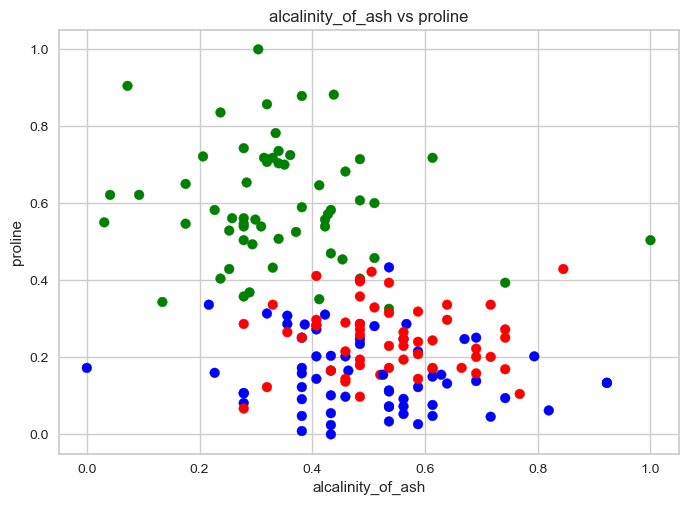

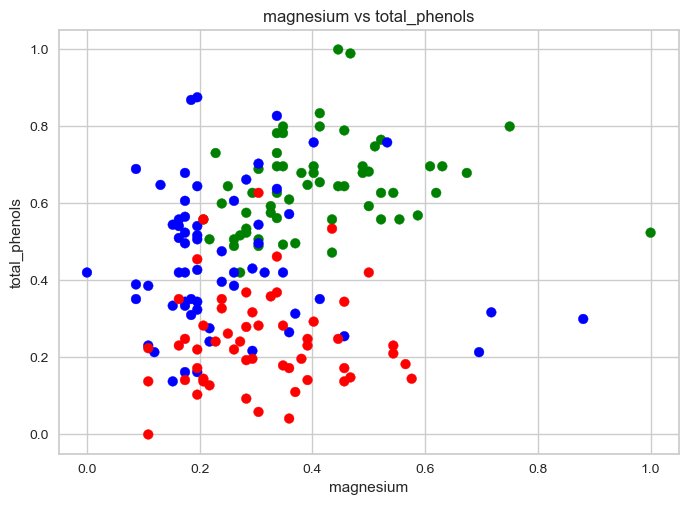

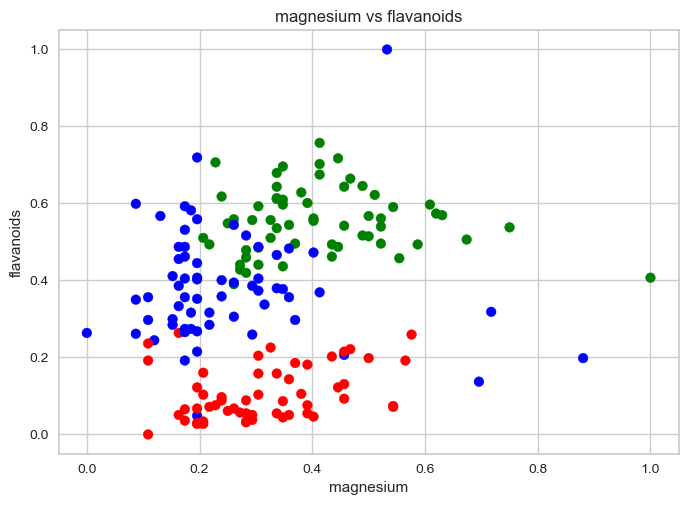

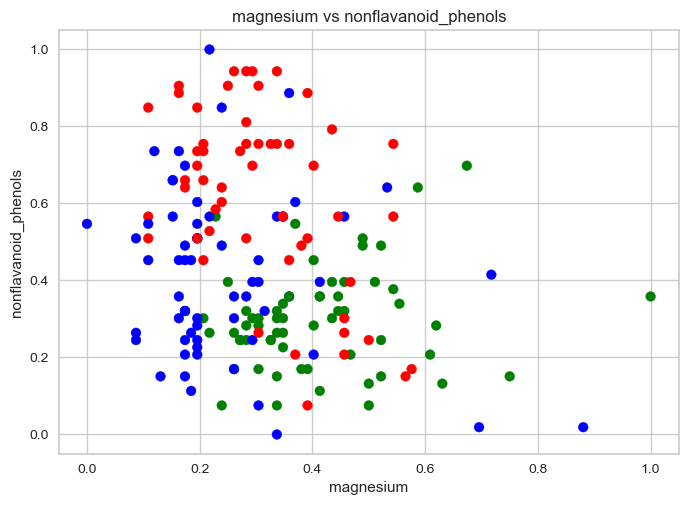

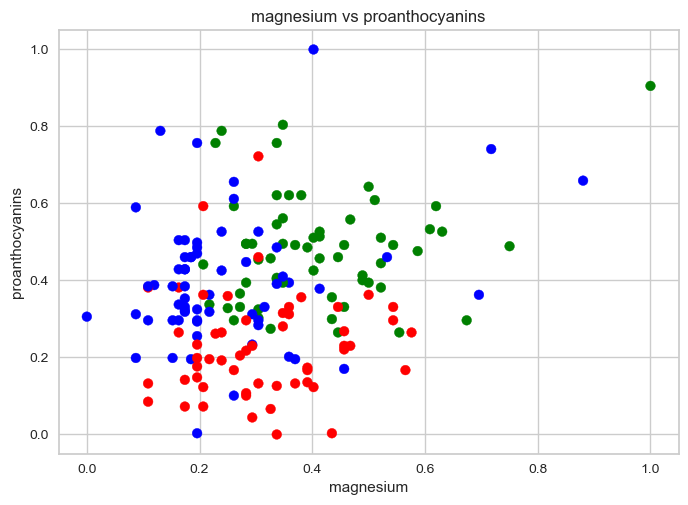

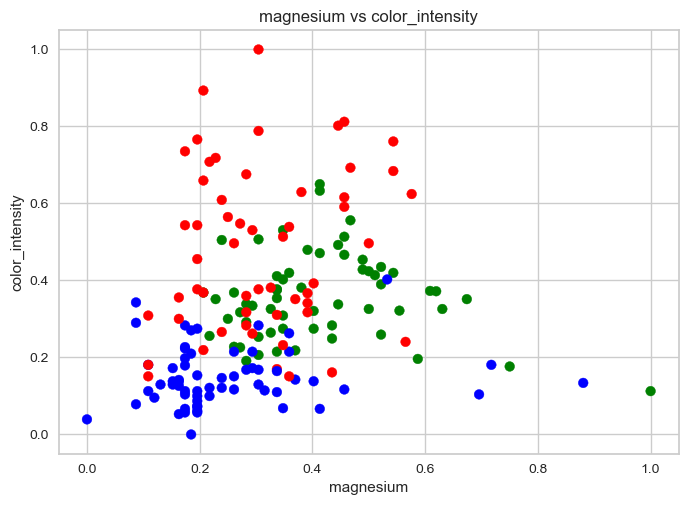

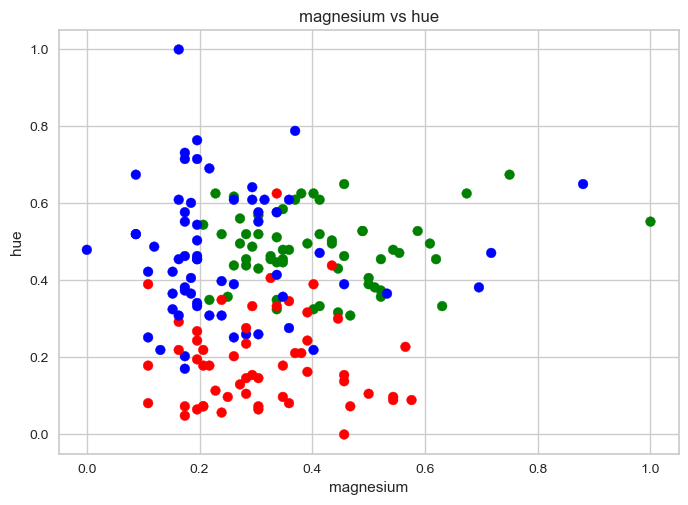

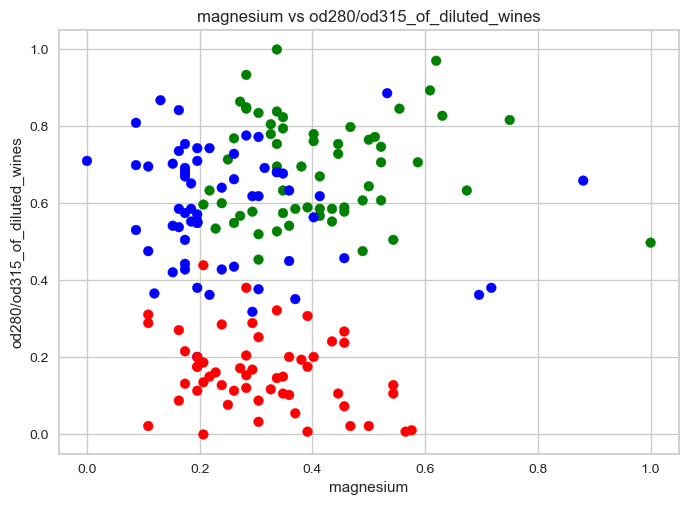

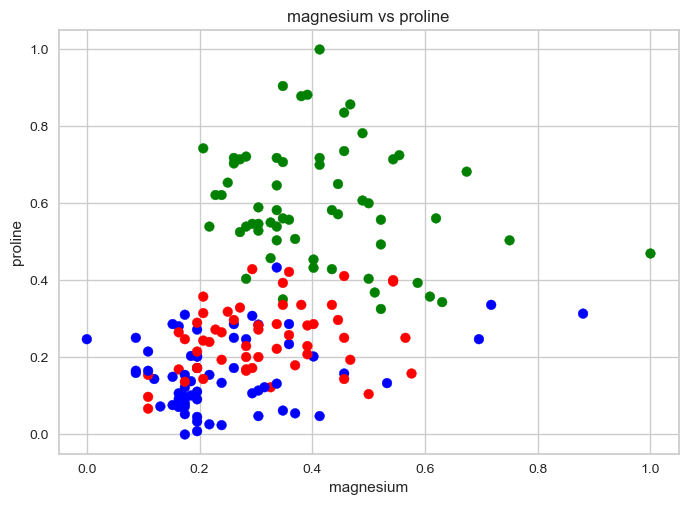

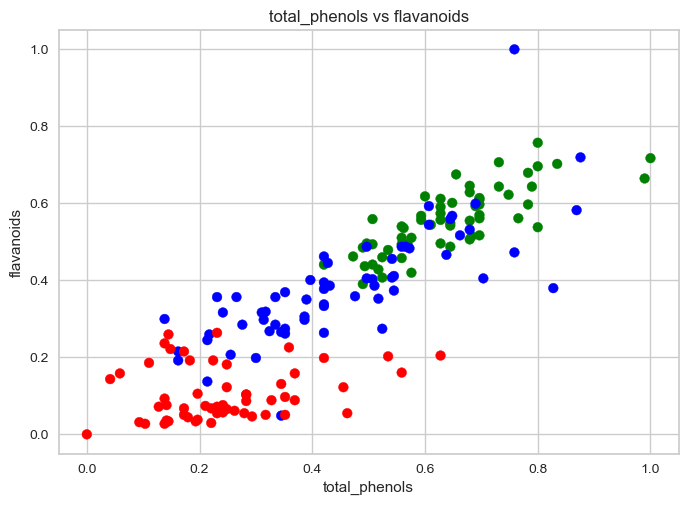

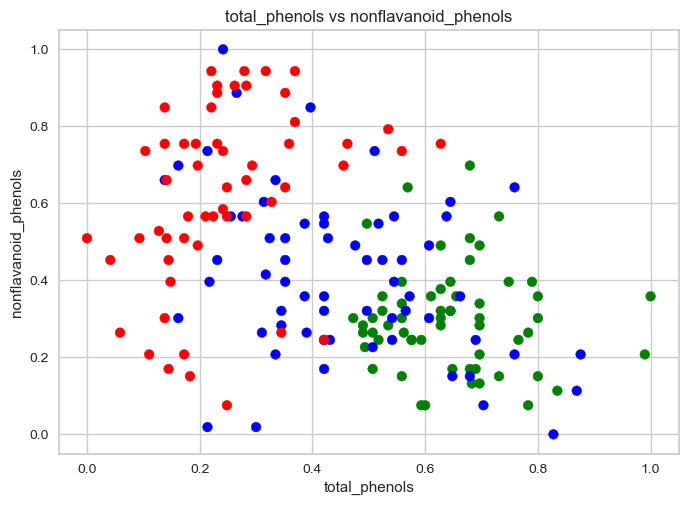

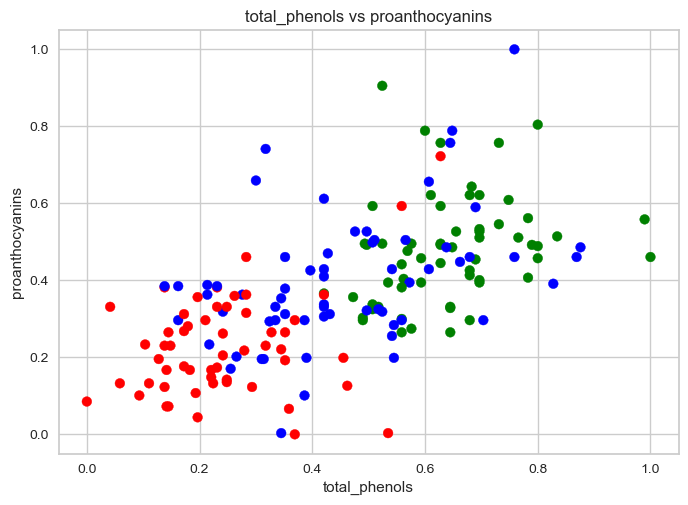

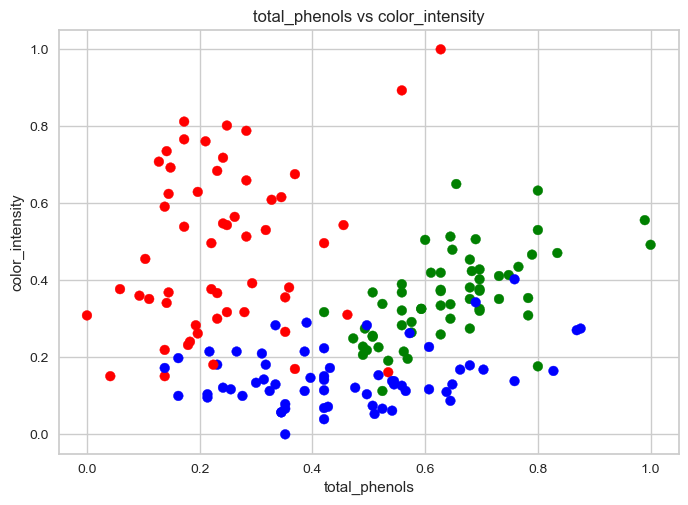

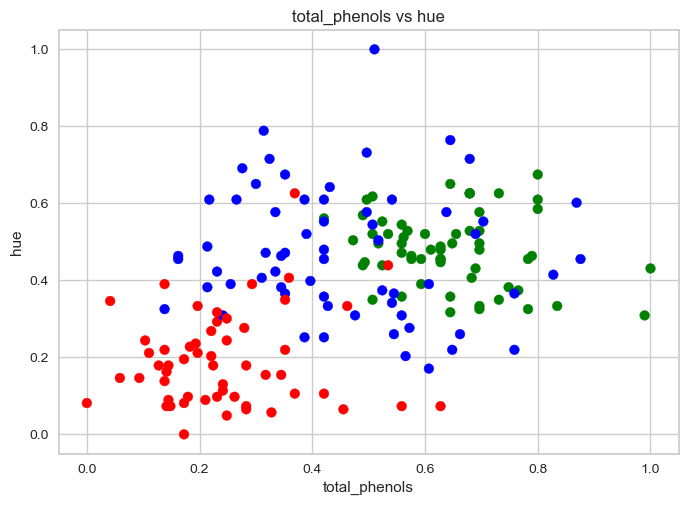

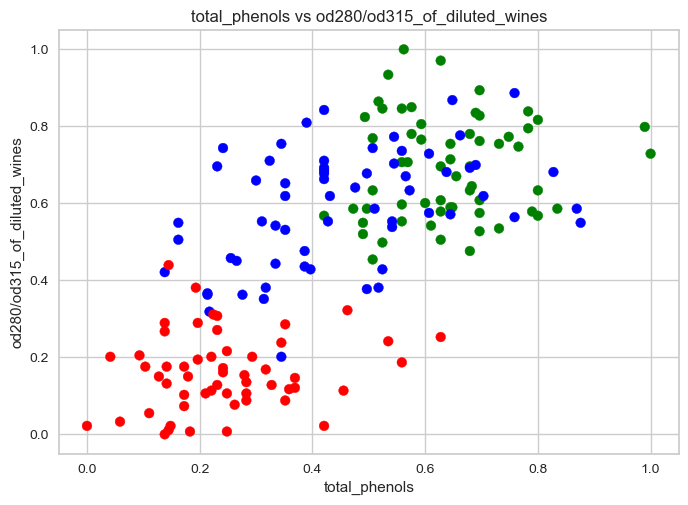

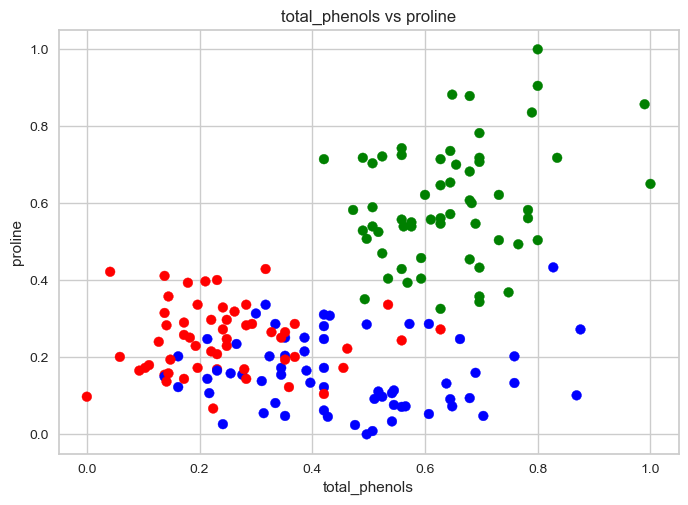

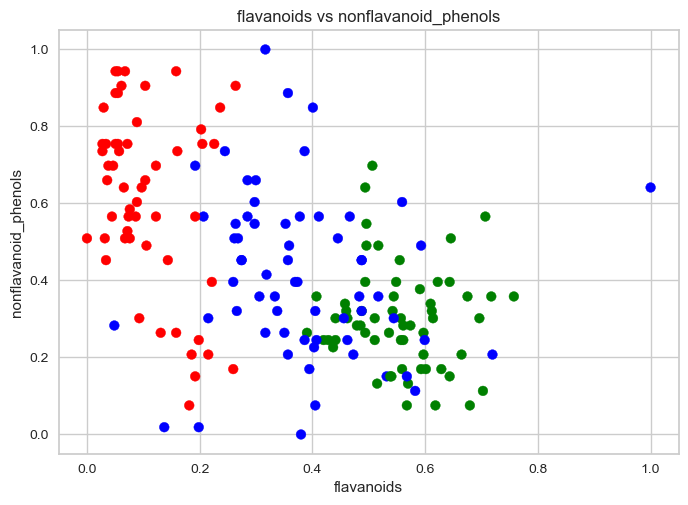

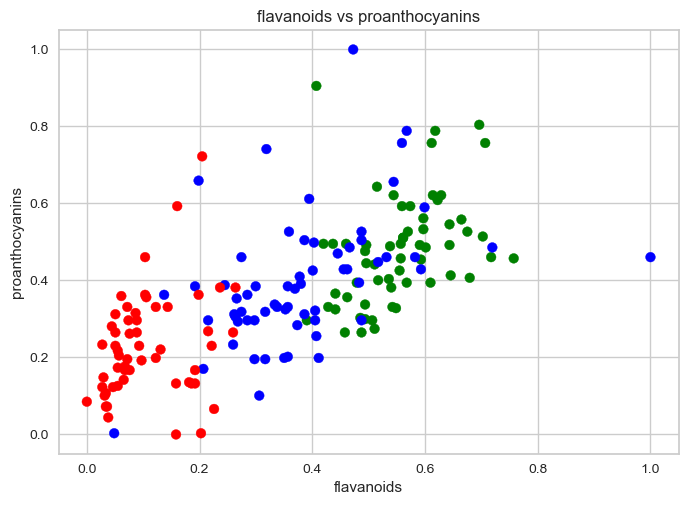

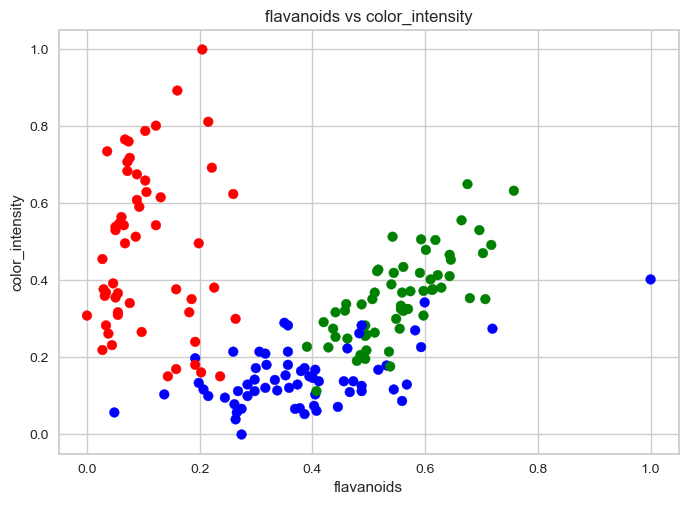

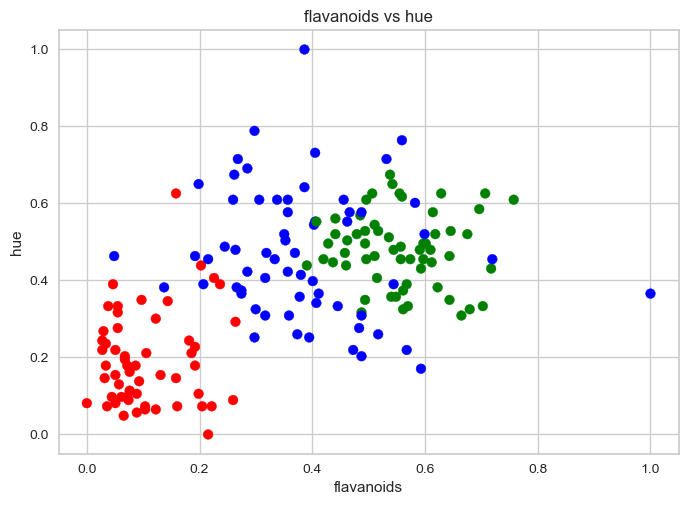

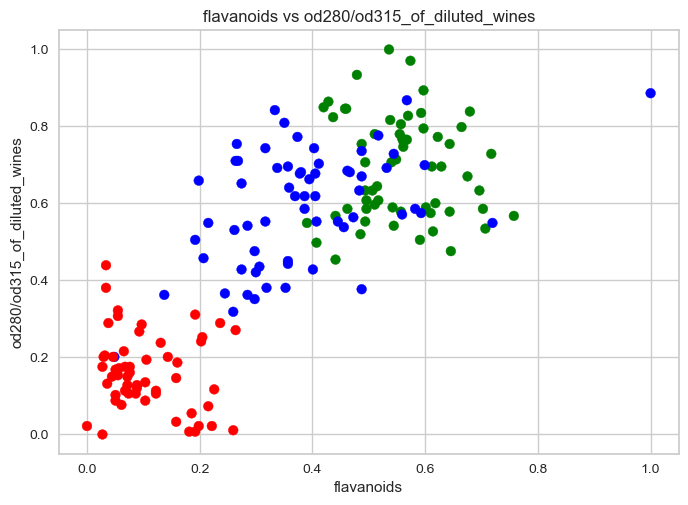

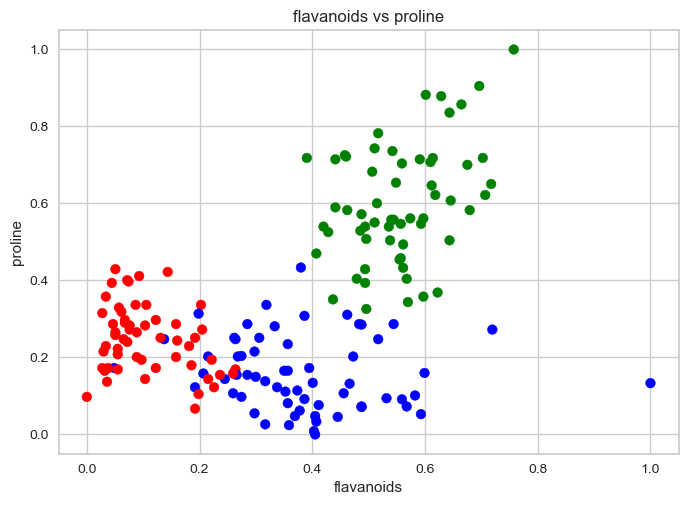

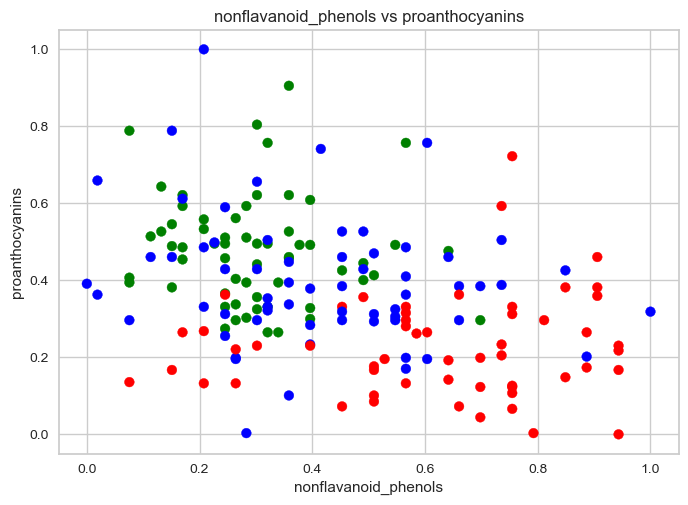

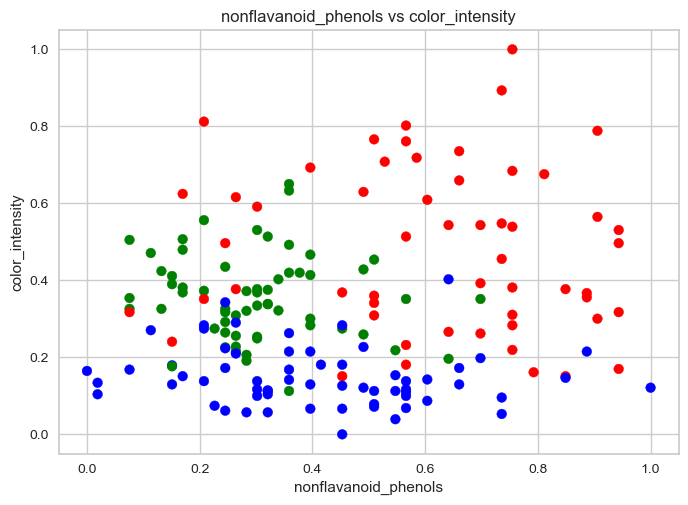

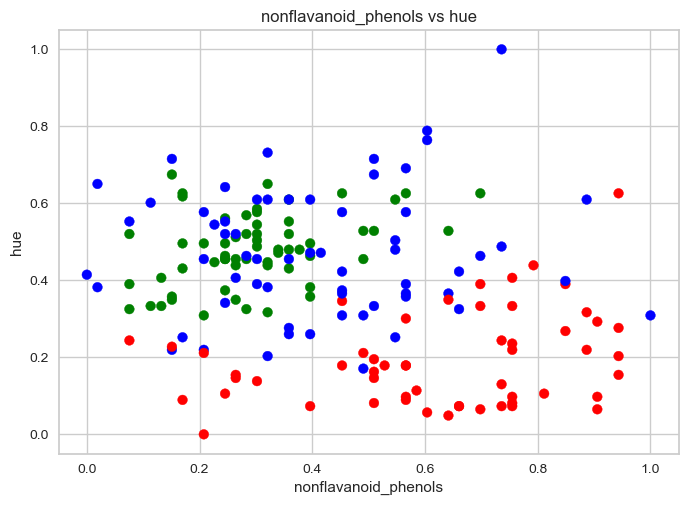

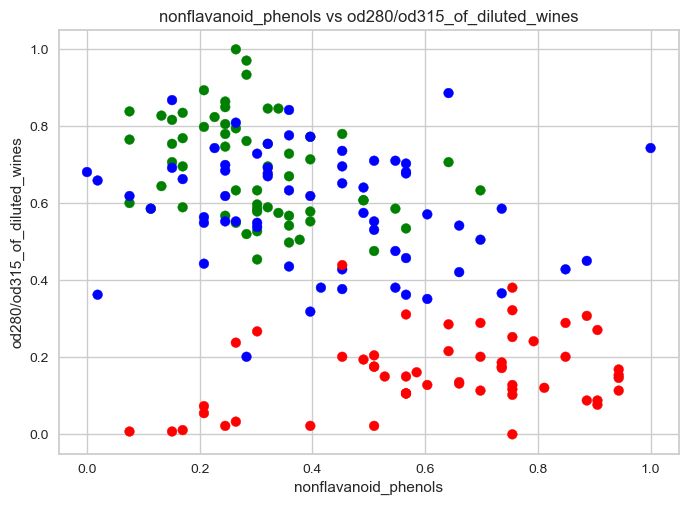

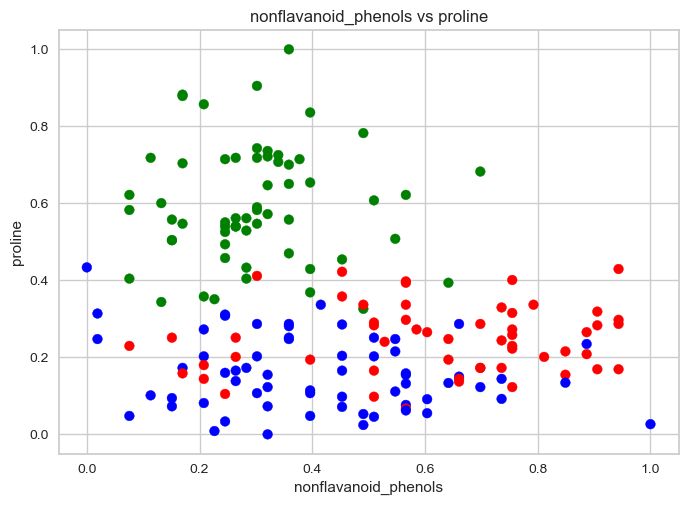

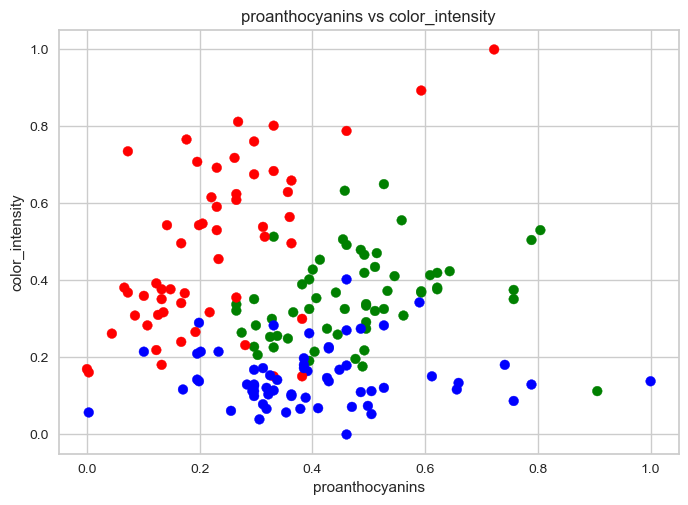

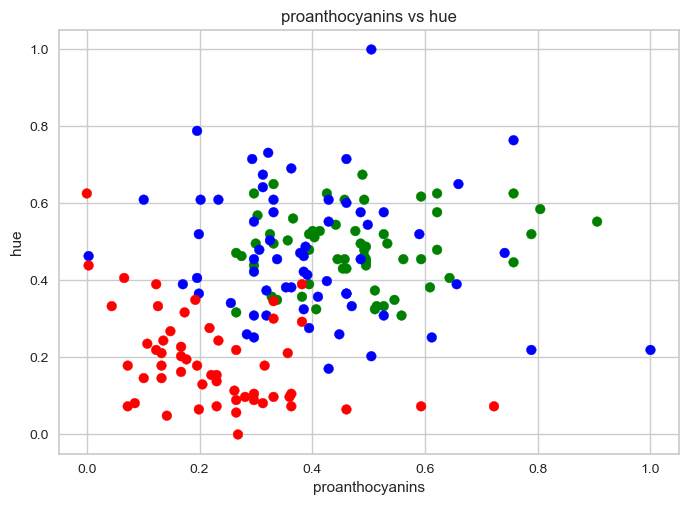

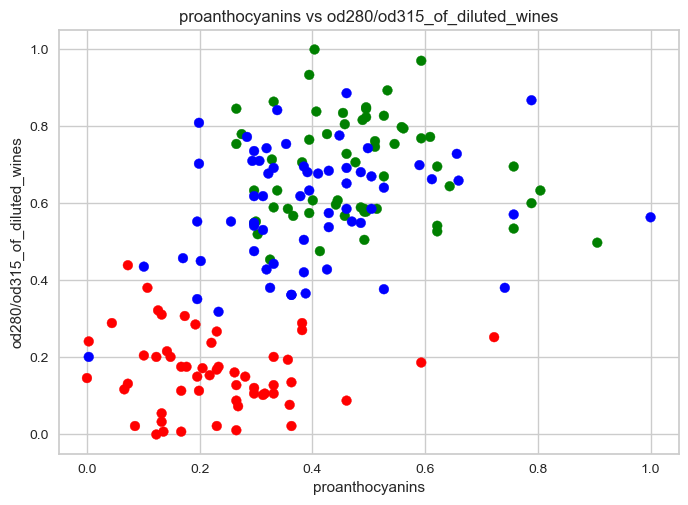

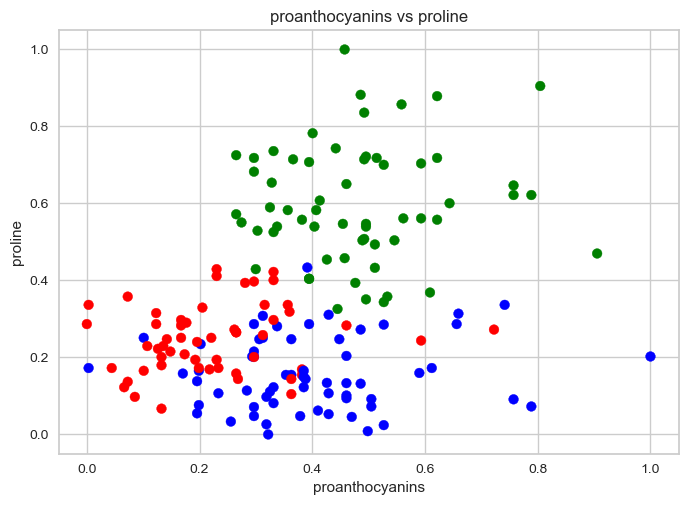

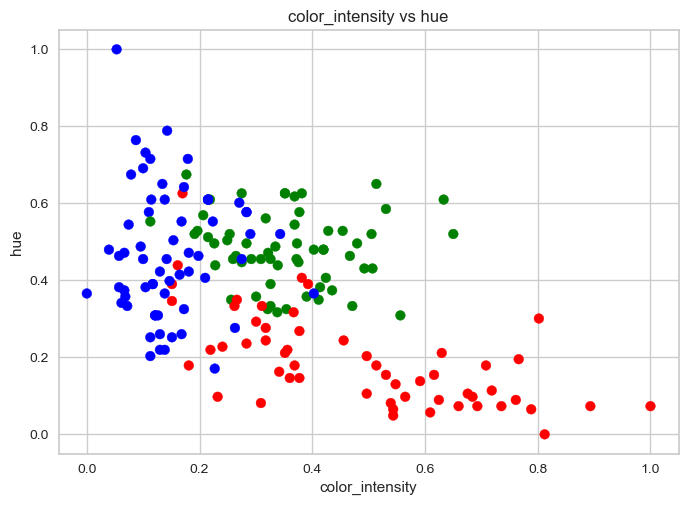

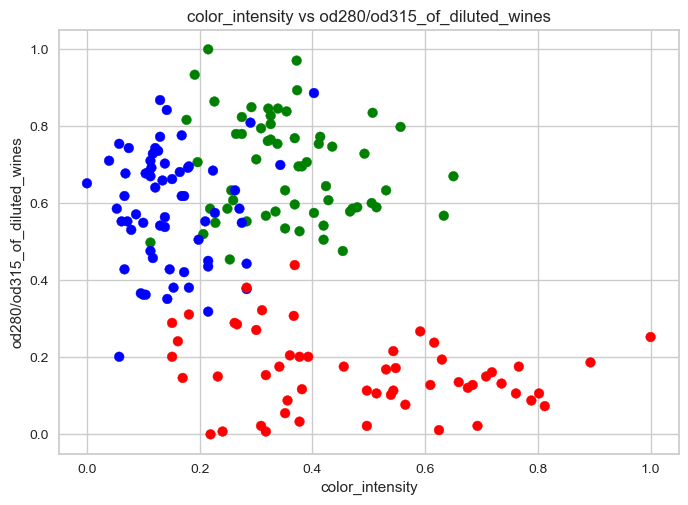

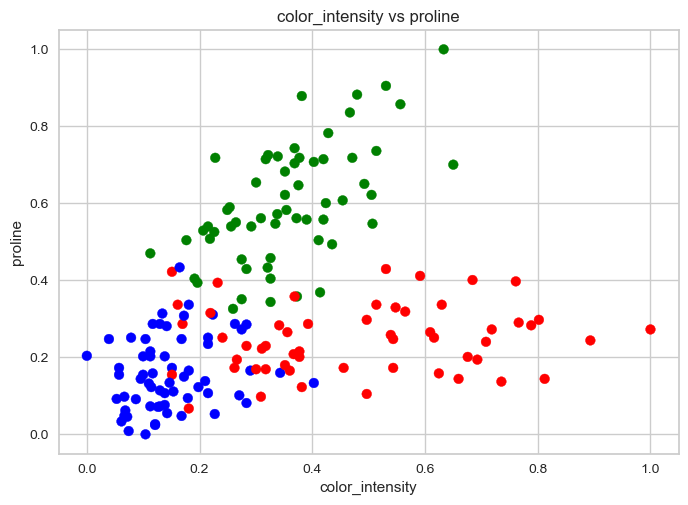

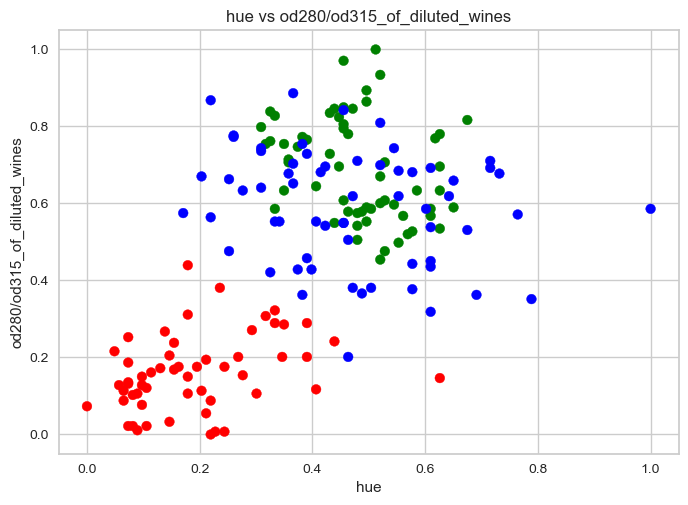

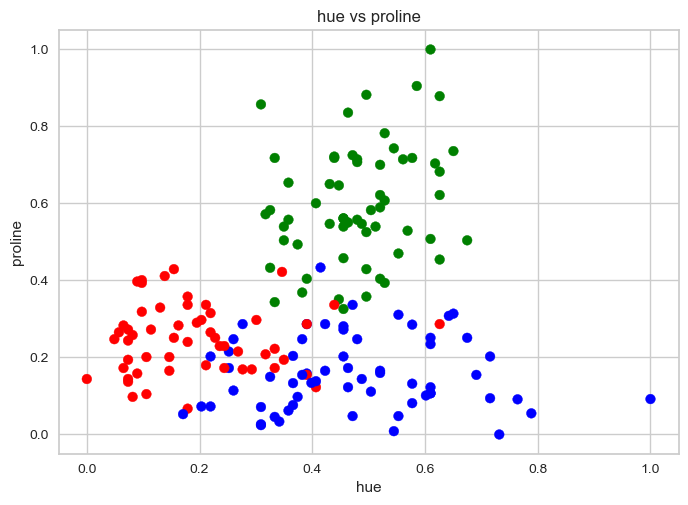

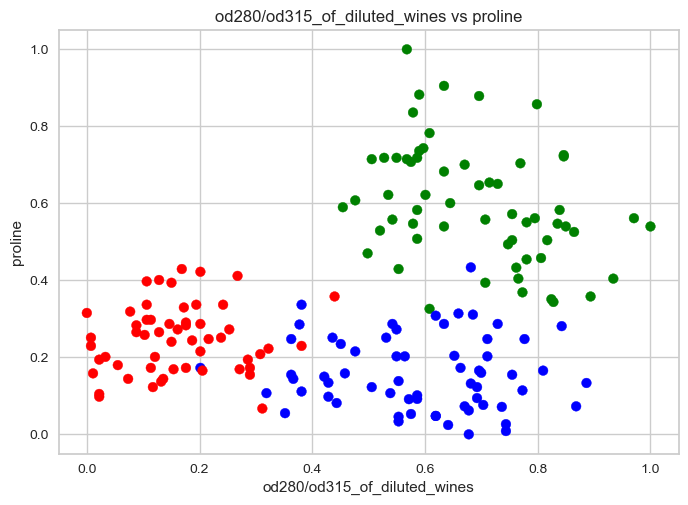

In [14]:
# 2bi. Pair of Attributes
N, cols = X.shape[1], df.columns[:-1]
color_map = {
    0: 'red',
    1: 'green',
    2: 'blue'
}
colors = [color_map[label] for label in solution.labels_]
for i in range(N):
    for j in range(i+1, N):
        plt.scatter(X[:, i], X[:, j], c=colors)

        plt.title(f'{cols[i]} vs {cols[j]}')
        plt.xlabel(cols[i])
        plt.ylabel(cols[j])
        
        plt.show()

In [15]:
pd.DataFrame(X, columns=cols)

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    0.842105    0.191700  0.572193           0.257732   0.619565   
1    0.571053    0.205534  0.417112           0.030928   0.326087   
2    0.560526    0.320158  0.700535           0.412371   0.336957   
3    0.878947    0.239130  0.609626           0.319588   0.467391   
4    0.581579    0.365613  0.807487           0.536082   0.521739   
..        ...         ...       ...                ...        ...   
173  0.705263    0.970356  0.582888           0.510309   0.271739   
174  0.623684    0.626482  0.598930           0.639175   0.347826   
175  0.589474    0.699605  0.481283           0.484536   0.543478   
176  0.563158    0.365613  0.540107           0.484536   0.543478   
177  0.815789    0.664032  0.737968           0.716495   0.282609   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.627586    0.573840              0.283019         0.593060   
1         0.575862    0.510549              0.245283         0.274448   
2         0.627586    0.611814              0.320755         0.757098   
3         0.989655    0.664557              0.207547         0.558360   
4         0.627586    0.495781              0.490566         0.444795   
..             ...         ...                   ...              ...   
173       0.241379    0.056962              0.735849         0.205047   
174       0.282759    0.086498              0.566038         0.315457   
175       0.210345    0.073840              0.566038         0.296530   
176       0.231034    0.071730              0.754717         0.331230   
177       0.368966    0.088608              0.811321         0.296530   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
0           0.372014  0.455285                      0.970696  0.561341  
1           0.264505  0.463415                      0.780220  0.550642  
2           0.375427  0.447154                      0.695971  0.646933  
3           0.556314  0.308943                      0.798535  0.857347  
4           0.259386  0.455285                      0.608059  0.325963  
..               ...       ...                           ...       ...  
173         0.547782  0.130081                      0.172161  0.329529  
174         0.513652  0.178862                      0.106227  0.336662  
175         0.761092  0.089431                      0.106227  0.397290  
176         0.684300  0.097561                      0.128205  0.400856  
177         0.675768  0.105691                      0.120879  0.201141  

[178 rows x 13 columns]

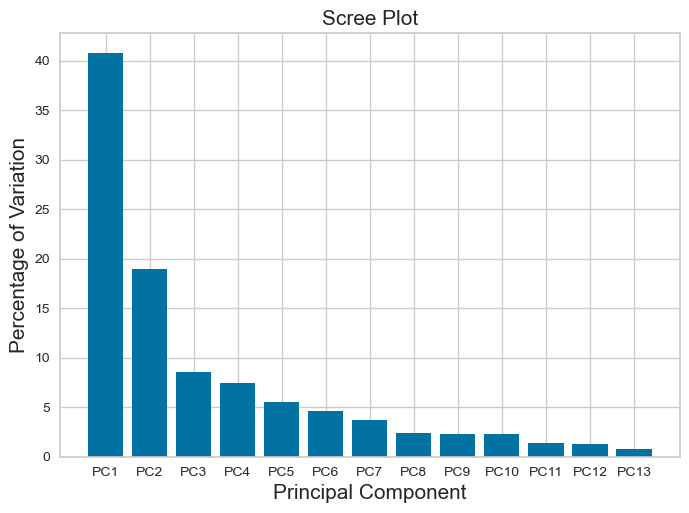

In [16]:
pca = PCA().fit(X)

per_var = np.round(pca.explained_variance_ratio_*100, 2)
princ_comp = ['PC' + str(x) for x in range(1, N+1)]
plt.bar(x = range(1, N+1), height = per_var, tick_label = princ_comp)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15);

In [17]:
pd.DataFrame(data=pca.components_, columns=princ_comp, index=cols)

PC1       PC2       PC3       PC4  \
alcohol                      -0.133368  0.248516 -0.000739  0.177839   
malic_acid                   -0.550884 -0.227391 -0.163091  0.079776   
ash                          -0.083848  0.492039  0.403009  0.477242   
alcalinity_of_ash            -0.040328  0.486032 -0.241976 -0.081694   
magnesium                    -0.278010 -0.412890  0.286394  0.418305   
total_phenols                -0.137254 -0.213103 -0.300965 -0.135610   
flavanoids                   -0.275352  0.310302 -0.171805 -0.297556   
nonflavanoid_phenols          0.555031 -0.076928 -0.123460  0.270756   
proanthocyanins               0.326687 -0.014471 -0.044362 -0.204924   
color_intensity              -0.035912 -0.237073 -0.056899 -0.132503   
hue                          -0.280685  0.170375  0.090757 -0.200864   
od280/od315_of_diluted_wines -0.056127  0.061654 -0.632538  0.476650   
proline                       0.011360  0.029428 -0.348604  0.212755   

                                   PC5       PC6       PC7       PC8  \
alcohol                      -0.088657 -0.395071 -0.414590  0.333109   
malic_acid                   -0.188166 -0.074145 -0.001007 -0.009960   
ash                           0.006551  0.253065  0.196105  0.285982   
alcalinity_of_ash             0.015880 -0.052643 -0.027033 -0.709095   
magnesium                     0.470899 -0.018030  0.002573 -0.360038   
total_phenols                -0.312519  0.283604  0.147045  0.197232   
flavanoids                    0.520419 -0.066524 -0.050698  0.214889   
nonflavanoid_phenols         -0.019937 -0.413384 -0.156461 -0.034232   
proanthocyanins               0.471910  0.351232  0.088960  0.122889   
color_intensity               0.325868 -0.263006 -0.199445  0.236775   
hue                           0.027277 -0.247764  0.030579 -0.032550   
od280/od315_of_diluted_wines  0.144635  0.333709 -0.299871  0.047311   
proline                       0.123445 -0.387628  0.775692  0.118318   

                                   PC9      PC10      PC11      PC12      PC13  
alcohol                      -0.252902  0.092329 -0.251137 -0.473492 -0.286862  
malic_acid                   -0.031418 -0.519707  0.237206  0.215562 -0.443888  
ash                           0.228342 -0.033100 -0.106589  0.297776 -0.151968  
alcalinity_of_ash             0.076574 -0.026322 -0.352498  0.082062 -0.229793  
magnesium                     0.148666  0.200582 -0.077162 -0.263396 -0.076556  
total_phenols                 0.503115  0.388032 -0.283041 -0.167278 -0.276349  
flavanoids                    0.466207 -0.212596  0.193315 -0.224561  0.188372  
nonflavanoid_phenols          0.483470 -0.036924  0.295372  0.102303 -0.260229  
proanthocyanins              -0.284054 -0.023708  0.068775 -0.060197 -0.624839  
color_intensity               0.018743  0.039143 -0.534248  0.602194  0.023829  
hue                          -0.099315  0.669144  0.458588  0.287815 -0.169476  
od280/od315_of_diluted_wines -0.164957  0.179211  0.157379  0.141063  0.193165  
proline                      -0.180607  0.016243 -0.095624 -0.081745  0.048119

In [18]:
pca_data = pca.transform(X)
pca_df = pd.DataFrame(pca_data, columns=princ_comp)
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -0.706336 -0.253193  0.024093  0.013263 -0.026580 -0.074364  0.065172   
1   -0.484977 -0.008823 -0.280482  0.075898 -0.238634 -0.071877  0.000686   
2   -0.521172 -0.189187  0.196217 -0.015784  0.045045  0.087116  0.125605   
3   -0.821644 -0.580906  0.081110  0.012235 -0.004805  0.081987 -0.068418   
4   -0.202546 -0.059467  0.300240 -0.102051  0.105777 -0.116790  0.057188   
..        ...       ...       ...       ...       ...       ...       ...   
173  0.739510 -0.471901  0.209360  0.149727 -0.291769 -0.083834  0.090191   
174  0.581781 -0.348366  0.083590  0.075226  0.050316 -0.025295  0.048014   
175  0.626313 -0.546857 -0.030495  0.170137  0.073738  0.031703  0.186334   
176  0.572991 -0.425516 -0.094537 -0.137393  0.150559  0.112254  0.148922   
177  0.701764 -0.513505  0.293910 -0.081371 -0.025138  0.090617 -0.113452   

          PC8       PC9      PC10      PC11      PC12      PC13  
0    0.138519  0.118627  0.277443  0.049711 -0.020012 -0.008723  
1   -0.181193  0.028066  0.114948  0.074158 -0.050838 -0.005249  
2    0.023178 -0.222133 -0.017270  0.012131 -0.104184 -0.023164  
3   -0.152253 -0.009376  0.061897 -0.090261  0.103306 -0.052921  
4   -0.009455  0.149605 -0.003043 -0.019021 -0.084094 -0.034172  
..        ...       ...       ...       ...       ...       ...  
173 -0.009818 -0.003105 -0.050829  0.043147  0.033437 -0.019795  
174  0.047284 -0.047386 -0.081414 -0.050335  0.051438 -0.032272  
175 -0.037139 -0.001465  0.073544  0.131167  0.111606  0.038913  
176 -0.024662  0.011399  0.196597  0.030275  0.057329  0.011031  
177  0.111742  0.102946 -0.050963 -0.027840  0.018735 -0.066483  

[178 rows x 13 columns]

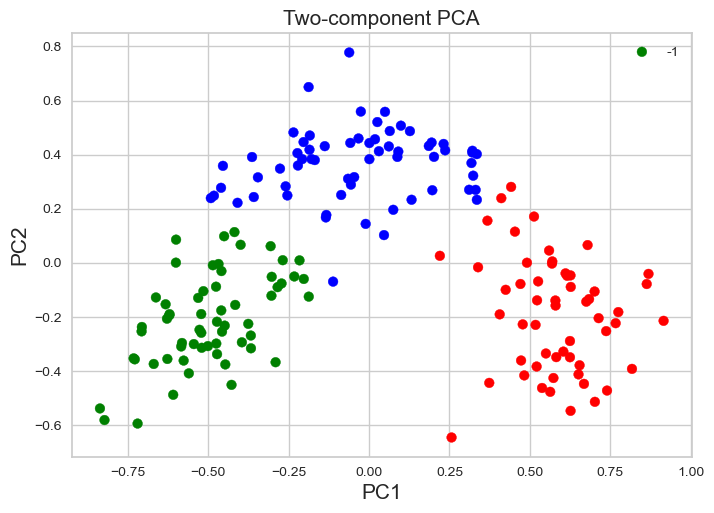

In [19]:
# 2bii. Principal Component Analysis
plt.scatter(pca_df.PC1, pca_df.PC2, c=colors)

plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
plt.title('Two-component PCA', fontsize=15)
plt.legend(labels)

# for visualization

In [46]:
# 2c. Comparison
new_df = df.copy()
new_df['Predicted Cluster'] = solution.labels_  

# we compared the original dataset with k- means clustering  
# check wine and predicted cluster

new_df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  wine  Predicted Cluster  
0                            3.92   1065.0     0                  1  
1                            3.40   1050.0     0                  1  
2                            3.17   1185.0     0                  1  
3                            3.45   1480.0     0                  1  
4                            2.93    735.0     0                  1  
..                            ...      ...   ...                ...  
173                          1.74    740.0     2                  0  
174                          1.56    750.0     2                  0  
175                          1.56    835.0     2                  0  
176                          1.62    840.0     2                  0  
177                          1.60    560.0     2                  0  

[178 rows x 15 columns]

### Conclusion:

#### Based on the clustering results, "K-means" performed well, separating clusters well with the true class labels. The high silhouette confirmed this, we did PCA too here. We compared the original dataset with the K-means clustering result at the end.
